This is the notebook to explore the hop_team database created from the readin .csv from the **hop teaming data**( https://careset.com/docgraph-hop-teaming-dataset/), the **NPI** ( https://download.cms.gov/nppes/NPI_Files.html.), **taxonomy**((https://www.nucc.org/index.php/code-sets-mainmenu-41/provider-taxonomy-mainmenu-40/csv-mainmenu-57)) and the **cbsa**(). The hop_teaming data has the info about the referrals between different NPI. NPI (National provider index) description is in the npi dataset. This will be used to find the taxonomycode for each npi (which is unique for the provider, its location, specilaity etc combination). The description of the taxonomy code is in the **"taxonomy dataset"**

In [1]:
import pandas as pd
import sqlite3
from tqdm.notebook import tqdm

In [2]:
#checking the tables in the sqlite_db

db = sqlite3.connect('data/hop_referal.sqlite')
db.execute("""SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';""").fetchall()

[('hop',), ('cbsa',), ('taxonomy',), ('npicode',)]

In [3]:
# create the index using the npi
# db = sqlite3.connect('data/hop_referal.sqlite')
# db.execute('CREATE INDEX npi ON npicode(npi)')
db.execute('CREATE INDEX taxonomy_code ON npicode(taxonomy_code)')
# db.execute('CREATE INDEX from_npi ON hop(from_npi)')
# db.execute('CREATE INDEX to_npi ON hop(to_npi)')
db.execute('CREATE INDEX code ON taxonomy(code)')

In [4]:
db.close()

In [5]:
query = """
SELECT * 
FROM npicode 
WHERE provider_business_practice_location_address_state_name = 'TN'
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    npicode_sqlite = pd.read_sql(query, db)
npicode_sqlite

,npi,entity_type_code,provider_organization_name_(legal_business_name),provider_last_name_(legal_name),provider_first_name,provider_middle_name,provider_name_prefix_text,provider_name_suffix_text,provider_credential_text,provider_first_line_business_practice_location_address,provider_second_line_business_practice_location_address,provider_business_practice_location_address_city_name,provider_business_practice_location_address_state_name,provider_business_practice_location_address_postal_code,taxonomy_code
0,1922001957,1.0,None,PRESLEY,RICHARD,E,None,None,M.D.,2011 MURPHY AVE,STE 302,NASHVILLE,TN,372032023.0,207V00000X
1,1104829134,1.0,None,FALCONER,RANDALL,None,DR.,None,MD,1728 N EASTMAN RD,None,KINGSPORT,TN,376642371.0,207Y00000X
2,1770586679,1.0,None,KAKOULLIS,STYLIANOS,A,None,None,MD,705 HOWELL ST,STE B,SPARTA,TN,385831008.0,207RC0200X
3,1124021001,1.0,None,YOUNGBLOOD,ELIZABETH,A,None,None,"RN, APN",343 FRANKLIN RD,STE 108,BRENTWOOD,TN,370275250.0,163W00000X
4,1760485817,1.0,None,MORAN,SAM,HOUSTON,None,None,M.D.,329 21ST AVE N,STE 4,NASHVILLE,TN,372031838.0,207V00000X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130653,1609883479,1.0,None,HAGGERTY,CHRISTOPHER,J,DR.,None,M.D.,1400 DOWELL SPRINGS BLVD.,STE. 310,KNOXVILLE,TN,379092445.0,207W00000X
130654,1790754190,1.0,None,MCDANIEL,DARYL,LEE,DR.,None,M.D.,1400 DOWELL SPRINGS BLVD.,STE. 310,KNOXVILLE,TN,37909.0,207WX0009X
130655,1992100390,1.0,None,PARKER,REED,B,DR.,None,O.D.,1400 DOWELL SPRINGS BLVD.,STE. 310,KNOXVILLE,TN,37909.0,152W00000X
130656,1376549071,1.0,None,SMOAK,SONYA,M.,DR.,None,O.D.,1400 DOWELL SPRINGS BLVD.,STE. 310,KNOXVILLE,TN,37909.0,152W00000X


In [174]:
query = """
SELECT * 
FROM npicode 
WHERE provider_business_practice_location_address_state_name = 'TN'
    AND`provider_organization_name_(legal_business_name)` LIKE '%VANDERBILT%'
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
     vandy= pd.read_sql(query, db)
vandy

,npi,entity_type_code,provider_organization_name_(legal_business_name),provider_last_name_(legal_name),provider_first_name,provider_middle_name,provider_name_prefix_text,provider_name_suffix_text,provider_credential_text,provider_first_line_business_practice_location_address,provider_second_line_business_practice_location_address,provider_business_practice_location_address_city_name,provider_business_practice_location_address_state_name,provider_business_practice_location_address_postal_code,taxonomy_code
0,1609056399,2.0,VANDERBILT CHILDREN'S,None,None,None,None,None,None,1702 THE VANDERBILT CLINIC,1301 22ND AVE SOUTH,NASHVILLE,TN,372320001.0,282NC2000X
1,1326224015,2.0,VANDERBILT CHILDRENS HOSPITAL,None,None,None,None,None,None,2200 CHILDRENS WAY STE 3115,None,NASHVILLE,TN,372320005.0,282NC2000X
2,1164609319,2.0,VANDERBILT MEDICAL CENTER,None,None,None,None,None,None,2200 CHILDRENS WAY,None,NASHVILLE,TN,372320034.0,282NC2000X
3,1396886537,2.0,VANDERBILT UNIVERSITY,None,None,None,None,None,None,324 COOLS SPRINGS BLVD.,None,FRANKLIN,TN,37067.0,332900000X
4,1437334950,2.0,VANDERBILT UNIVERSITY,None,None,None,None,None,None,4163 THE VILLAGE AT VANDERBILT,None,NASHVILLE,TN,372326878.0,103T00000X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1104166313,2.0,"VANDERBILT MAURY RADIATION ONCOLOGY, LLC",None,None,None,None,None,None,1003 RESERVE BLVD,SUITE 120,SPRING HILL,TN,37174.0,261QX0203X
108,1770944464,2.0,VANDERBILT UNIVERSITY MEDICAL CENTER,None,None,None,None,None,None,3601 THE VANDERBILT CLINIC STE 3501,None,NASHVILLE,TN,372325100.0,332B00000X
109,1972027159,2.0,VANDERBILT UNIVERSITY MEDICAL CENTER,None,None,None,None,None,None,2906 FOSTER CREIGHTON DR STE 100,None,NASHVILLE,TN,372043733.0,261QE0700X
110,1144241985,2.0,"VANDERBILT IMAGING SERVICES, LLC",None,None,None,None,None,None,1909 ACKLEN AVE,None,NASHVILLE,TN,372123713.0,2085R0202X


In [178]:
vandy['provider_organization_name_(legal_business_name)'].to_list()
vandy['provider_organization_name_(legal_business_name)'].nunique() #33
vandy['provider_organization_name_(legal_business_name)'].unique()


array(["VANDERBILT CHILDREN'S", 'VANDERBILT CHILDRENS HOSPITAL',
       'VANDERBILT MEDICAL CENTER', 'VANDERBILT UNIVERSITY',
       'VANDERBILT UNIVERSITY MEDICAL CENTER', 'CONCENTRA VANDERBILT LLC',
       "MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL",
       'VANDERBILT PSYCHIATRIC HOSPITAL, LLC',
       'VANDERBILT HEART AND VASCULAR INSTITUTE',
       'VANDERBILT ORTHOPAEDIC INSTITUTE',
       'DOUGLAS L. VANDERBILT, M.D. ,P.C.',
       'VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC',
       'VANDERBILT HOSPITAL', 'VANDERBILT IMAGING SERVICES, LLC',
       "MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDERBILT",
       'VANDERBILT UNIVERSITY HOSPITAL',
       'VANDERBILT ORTHOPAEDICS AND REHABILITATION COOL SPRINGS',
       "VANDERBILT CHILDREN'S HOSPITAL PHARMACY",
       'VANDERBILT PSYCHIATRIC HOSPITAL',
       'VANDERBILT ST. THOMAS IMAGING, GP',
       'VANDERBILT HEALTH PHARMACY GROUP LLC',
       'VANDERBILT HOME CARE SERVICES, LLC',
       'VANDERBILT UNIVERSITY MEDIC

In [190]:
query = """
SELECT * 
FROM npicode 
WHERE provider_business_practice_location_address_state_name = 'TN'
    AND`provider_organization_name_(legal_business_name)` LIKE '%SAINT THOMAS%'
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    saint_thomas= pd.read_sql(query, db)
saint_thomas

,npi,entity_type_code,provider_organization_name_(legal_business_name),provider_last_name_(legal_name),provider_first_name,provider_middle_name,provider_name_prefix_text,provider_name_suffix_text,provider_credential_text,provider_first_line_business_practice_location_address,provider_second_line_business_practice_location_address,provider_business_practice_location_address_city_name,provider_business_practice_location_address_state_name,provider_business_practice_location_address_postal_code,taxonomy_code
0,1538139811,2.0,SAINT THOMAS OUTPATIENT NEUROSURGICAL CENTER,None,None,None,None,None,None,4230 HARDING RD,SUITE 901,NASHVILLE,TN,372052013.0,261QA1903X
1,1497856132,2.0,SAINT THOMAS OUTPATIENT CARDIAC CATHETERIZATIO...,None,None,None,None,None,None,4230 HARDING PIKE,SUITE 230,NASHVILLE,TN,372052013.0,207RC0000X
2,1306016779,2.0,WILLIAMSON SAINT THOMAS COMMUNITY HEALTH,None,None,None,None,None,None,4323 CAROTHERS PKWY,SUITE #409,FRANKLIN,TN,370675914.0,207R00000X
3,1871859348,2.0,SAINT THOMAS HEART,None,None,None,None,None,None,4220 HARDING PIKE,None,NASHVILLE,TN,372052005.0,282N00000X
4,1508117722,2.0,SAINT THOMAS HEALTH,None,None,None,None,None,None,460 METROPLEX DR,STE 114,NASHVILLE,TN,372113156.0,341600000X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1225550031,2.0,SAINT THOMAS HEALTH,None,None,None,None,None,None,150 EAST SWAN STREET,None,CENTERVILLE,TN,37033.0,3336C0003X
57,1528634458,2.0,SAINT THOMAS HEALTH,None,None,None,None,None,None,140 VO TECH DR STE 2,None,MCMINNVILLE,TN,371101329.0,3336C0003X
58,1861806911,2.0,SAINT THOMAS HEALTH,None,None,None,None,None,None,300 20TH AVE N STE 104,None,NASHVILLE,TN,372035179.0,3336C0003X
59,1639234644,2.0,SAINT THOMAS HEALTH,None,None,None,None,None,None,1020 NORTH HIGHLAND AVE SUITE B,None,MURFREESBORO,TN,37130.0,3336C0003X


In [193]:
saint_thomas['provider_organization_name_(legal_business_name)'].to_list()
saint_thomas['provider_organization_name_(legal_business_name)'].nunique() #26
saint_thomas['provider_organization_name_(legal_business_name)'].unique()

array(['SAINT THOMAS OUTPATIENT NEUROSURGICAL CENTER',
       'SAINT THOMAS OUTPATIENT CARDIAC CATHETERIZATION CENTER, LLC',
       'WILLIAMSON SAINT THOMAS COMMUNITY HEALTH', 'SAINT THOMAS HEART',
       'SAINT THOMAS HEALTH',
       'SAINT THOMAS EMERGENCY MEDICAL SERVICES, LLC',
       'SAINT THOMAS WEST HOSPITAL', 'SAINT THOMAS HOME HEALTH',
       'SAINT THOMAS MEDICAL PARTNERS',
       'SAINT THOMAS CAMPUS SURGICARE LP',
       'SAINT THOMAS HOME RECOVERY CARE, LLC',
       'SAINT THOMAS DEKALB HOSPITAL, LLC',
       'SAINT THOMAS STONES RIVER HOSPITAL, LLC',
       'SAINT THOMAS HICKMAN HOSPITAL',
       'SAINT THOMAS HIGHLANDS HOSPITAL, LLC',
       'SAINT THOMAS RIVER PARK HOSPITAL, LLC',
       'SAINT THOMAS RUTHERFORD HOSPITAL',
       'SAINT THOMAS RUTHERFORD HOSPITAL LAB',
       'SAINT THOMAS WEST HOSPITAL LAB', 'SAINT THOMAS NETWORK',
       'CENTRAL SETON SAINT THOMAS HEALTH SERVICES',
       'SAINT THOMAS CARDIOLOGY CONSULTANTS, PC',
       'ASCENSION SAINT THOMAS LEBA

In [2]:
#checking the cbsa table 
query = "SELECT * FROM hop LIMIT 10"

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    hop_sqlite = pd.read_sql(query, db)
hop_sqlite

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1508085911,1730166125,58,67,23.925,43.923
1,1508167040,1730166125,51,51,28.196,52.876
2,1508863549,1730166125,340,391,18.302,42.422
3,1508867870,1730166125,50,79,12.658,26.402
4,1508011040,1730166224,132,145,8.579,28.053
5,1497971881,1730166224,120,135,49.822,61.955
6,1508163577,1730166224,67,127,8.346,26.050
7,1508159674,1730166224,145,212,2.939,10.660
8,1508205808,1730166224,48,64,14.156,35.859
9,1508170853,1730166307,81,115,32.930,56.683


In [11]:
query = """
SELECT * 
FROM npicode 
WHERE provider_business_practice_location_address_state_name = 'TN'
    AND`provider_organization_name_(legal_business_name)` LIKE '%TRISTAR%'
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    npicode_sqlite = pd.read_sql(query, db)
npicode_sqlite

,npi,entity_type_code,provider_organization_name_(legal_business_name),provider_last_name_(legal_name),provider_first_name,provider_middle_name,provider_name_prefix_text,provider_name_suffix_text,provider_credential_text,provider_first_line_business_practice_location_address,provider_second_line_business_practice_location_address,provider_business_practice_location_address_city_name,provider_business_practice_location_address_state_name,provider_business_practice_location_address_postal_code,taxonomy_code
0,1679835623,2.0,TRISTAR MEDICAL GROUP - CENTENNIAL PRIMARY CAR...,None,None,None,None,None,None,330 23RD AVE N,SUITE 300,NASHVILLE,TN,372031522.0,207R00000X
1,1083039838,2.0,TRISTAR PERFORMANCE PLC,None,None,None,None,None,None,785 OLD HICKORY BLVD,STE. 200,BRENTWOOD,TN,370274512.0,111N00000X
2,1164834057,2.0,"TRISTAR JOINT REPLACEMENT INSTITUTE, LLC",None,None,None,None,None,None,2400 PATTERSON ST,SUITE 100,NASHVILLE,TN,372031562.0,207X00000X
3,1003152208,2.0,"TRISTAR GYNECOLOGY ONCOLOGY, LLC",None,None,None,None,None,None,330 23RD AVE N,SUITE 600,NASHVILLE,TN,372031534.0,207VX0201X
4,1821548280,2.0,"TRISTAR MEDICAL GROUP - LEGACY HEALTH, LLC",None,None,None,None,None,None,"2400 PATTERSON STREET, SUITE 418",None,NASHVILLE,TN,372031575.0,207R00000X
5,1770851552,2.0,TRISTAR CARDIOVASCULAR SURGERY LLC,None,None,None,None,None,None,2400 PATTERSON ST,STE. 307,NASHVILLE,TN,372031562.0,207RC0000X
6,1952652414,2.0,"TRISTAR RADIATION ONCOLOGY, LLC",None,None,None,None,None,None,2410 PATTERSON ST,None,NASHVILLE,TN,372031551.0,2085R0001X
7,1437635034,2.0,TRISTAR PHYSICAL THERAPY AND CHIROPRACTIC,None,None,None,None,None,None,2024 E ANDREW JOHNSON HWY,None,MORRISTOWN,TN,378145410.0,261QP2000X
8,1124672704,2.0,"TRISTAR MAURY BEHAVIORAL HEALTHCARE, LLC",None,None,None,None,None,None,1001 N JAMES M CAMPBELL BLVD,None,COLUMBIA,TN,384012689.0,283Q00000X
9,1609326040,2.0,"TRISTAR FAMILY CARE, LLC",None,None,None,None,None,None,313 N MAIN ST FL 2,None,ASHLAND CITY,TN,370151347.0,207R00000X


In [89]:
#REFERALS from vandy to tristar

query = """
SELECT *
FROM npicode
INNER JOIN hop
ON npicode.npi = hop.from_npi
WHERE provider_business_practice_location_address_state_name = 'TN'
    AND`provider_organization_name_(legal_business_name)` LIKE '%VANDERBILT%'
    AND 
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    vandy_tristar = pd.read_sql(query, db)
vandy_tristar

DatabaseError: Execution failed on sql '
SELECT *
FROM npicode
INNER JOIN hop
ON npicode.npi = hop.from_npi
WHERE provider_business_practice_location_address_state_name = 'TN'
    AND`provider_organization_name_(legal_business_name)` LIKE '%VANDERBILT%'
    AND 
': incomplete input

In [ ]:
#REFERALS from vandy to tristar

query = """
SELECT *
FROM npicode
LIMIT 3

"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    npi_explo = pd.read_sql(query, db)
npi_explo

thought process vandy_npi = hop.from_npi(to_npi = taxonomy code = missing specialities)

In [6]:
query = """
WITH tn_npi AS (
SELECT * 
FROM npicode 
WHERE provider_business_practice_location_address_state_name = 'TN'),

npi_hop AS (SELECT *
FROM tn_npi
INNER JOIN hop
ON tn_npi.npi = hop.from_npi)

SELECT to_npi,
SUM (transaction_count) AS npi_total
FROM npi_hop
GROUP BY to_npi
ORDER BY npi_total DESC

 """
##employ the group_by

# SUM transaction_count AS count
# GROUP BY to_npi
# ORDER BY count DESC
with sqlite3.connect('data/hop_referal.sqlite') as db: 
    top_refered_to = pd.read_sql(query, db)
top_refered_to

,to_npi,npi_total
0,1558365890,1906416
1,1104202761,1726855
2,1003863580,1667273
3,1093741464,1554693
4,1437194669,1552645
...,...,...
79166,1992741060,50
79167,1992773675,50
79168,1992874721,50
79169,1992884183,50


In [7]:
top_refered_to.to_csv('data/topreferredintn.csv')

In [13]:
#checking the cbsa table 
query = "SELECT count(*) FROM taxonomy"

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    tax_sqlite = pd.read_sql(query, db)
tax_sqlite

,count(*)
0,873


to_npi in TN
FROM_npi in the hops : from_npi in TN
    
# to_npi has to be matched to the npi table to find the taxonomy code

#[('hop',), ('cbsa',), ('taxonomy',), ('npicode',)]



In [23]:
query = """
SELECT code, grouping, classification, specialization, nc.npi
FROM taxonomy AS tax
INNER JOIN npicode AS nc
ON nc.taxonomy_code = tax.code
  
    
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    tax_npi_hop = pd.read_sql(query, db)
tax_npi_hop

,code,grouping,classification,specialization,npi
0,193200000X,Group,Multi-Specialty,None,1225141096
1,193200000X,Group,Multi-Specialty,None,1235131467
2,193200000X,Group,Multi-Specialty,None,1275731010
3,193200000X,Group,Multi-Specialty,None,1285923201
4,193200000X,Group,Multi-Specialty,None,1285940635
...,...,...,...,...,...
7373399,342000000X,Transportation Services,Transportation Network Company,None,1982376372
7373400,342000000X,Transportation Services,Transportation Network Company,None,1992419204
7373401,342000000X,Transportation Services,Transportation Network Company,None,1992446835
7373402,342000000X,Transportation Services,Transportation Network Company,None,1992471056


In [33]:
#checking the cbsa table 
# query = "SELECT DISTINCT usps_zip_pref_city AS city FROM cbsa WHERE usps_zip_pref_state = 'TN' ORDER BY city ASC LIMIT 50 "
query = "SELECT * FROM cbsa WHERE cbsa = 34980 ORDER BY zip"
with sqlite3.connect('data/hop_referal.sqlite') as db: 
    cbsa_sqlite = pd.read_sql(query, db)
cbsa_sqlite

,zip,cbsa,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,37010,34980,ADAMS,TN,0.393807,0.902439,1.0,0.404019
1,37011,34980,ANTIOCH,TN,1.000000,1.000000,1.0,1.000000
2,37012,34980,ALEXANDRIA,TN,0.194853,0.078431,0.0,0.189303
3,37013,34980,ANTIOCH,TN,1.000000,1.000000,1.0,1.000000
4,37014,34980,ARRINGTON,TN,1.000000,1.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...
152,38560,34980,ELMWOOD,TN,1.000000,1.000000,0.0,1.000000
153,38563,34980,GORDONSVILLE,TN,1.000000,1.000000,1.0,1.000000
154,38567,34980,HICKMAN,TN,0.931818,1.000000,1.0,0.933921
155,38569,34980,LANCASTER,TN,0.289183,0.333333,0.5,0.292276


In [6]:
# query= """
# SELECT zip 
# FROM cbsa
# WHERE cbsa = 34980
# """

query= """
with cbsa_npi AS (
SELECT npi,
taxonomy_code,
entity_type_code AS entity_code,
`provider_organization_name_(legal_business_name)` AS facility_name,
`provider_last_name_(legal_name)` AS doc_lastname,
provider_first_name AS doc_firstname,
provider_middle_name AS doc_middlename,
provider_first_line_business_practice_location_address AS primary_address,
provider_second_line_business_practice_location_address AS secondary_address,
provider_business_practice_location_address_city_name AS city,
provider_business_practice_location_address_state_name AS state,
SUBSTR(provider_business_practice_location_address_postal_code, 1, 5) AS zipcode
FROM npicode),

npi_cbsa_added AS (
SELECT cbsa_npi.*
FROM cbsa_npi
    INNER JOIN cbsa 
    ON cbsa_npi.zipcode = zip
    WHERE cbsa.cbsa = 34980)

SELECT npi_cbsa_added.*, grouping, classification, specialization
FROM taxonomy AS tax
    INNER JOIN npi_cbsa_added --use the right join instead
    ON tax.code = npi_cbsa_added.taxonomy_code
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    xyz = pd.read_sql(query, db)
xyz


# npi,
# entity_type_code AS entity_code,
# provider_organization_name_(legal_business_name) AS facility_name,
# provider_last_name_(legal_name) AS doc_lastname,
# provider_first_name AS doc_firstname,
# provider_middle_name AS doc_middlename,
# provider_first_line_business_practice_location_address AS primary_address,
# provider_second_line_business_practice_location_address AS secondary_address,
# provider_business_practice_location_address_city_name AS city,
# provider_business_practice_location_address_state_name AS state,
# provider_business_practice_location_address_postal_code AS zipcode,
# taxonomy_code

,npi,taxonomy_code,entity_code,facility_name,doc_lastname,doc_firstname,doc_middlename,primary_address,secondary_address,city,state,zipcode,grouping,classification,specialization
0,1053519678,207K00000X,2.0,SULLIVAN ASTHMA AND ALLERGY CARE PC,None,None,None,3098 CAMPBELL STATION PKWY,SUITE A202,SPRING HILL,TN,37174,Allopathic & Osteopathic Physicians,Allergy & Immunology,None
1,1528239746,207K00000X,1.0,None,REMBERT,FRANCIS,M,4304 LINDAWOOD DR,None,NASHVILLE,TN,37215,Allopathic & Osteopathic Physicians,Allergy & Immunology,None
2,1821237975,207K00000X,1.0,None,TURES,JOHN,FRANCIS,405 SHACKLEFORD CT,None,NASHVILLE,TN,37215,Allopathic & Osteopathic Physicians,Allergy & Immunology,None
3,1457340184,207K00000X,1.0,None,RUSZNAK,CSABA,None,1370 GATEWAY BLVD,SUITE 230,MURFREESBORO,TN,37129,Allopathic & Osteopathic Physicians,Allergy & Immunology,None
4,1134306244,207K00000X,2.0,"VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC",None,None,None,2611 WEST END AVENUE,SUITE 210,NASHVILLE,TN,37203,Allopathic & Osteopathic Physicians,Allergy & Immunology,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47384,1093438558,342000000X,2.0,COMMUNITY TRANSPORT CORPORATION,None,None,None,115 MAIN ST S STE D,None,CARTHAGE,TN,37030,Transportation Services,Transportation Network Company,None
47385,1043933211,342000000X,2.0,RIGHT WAY SERVICE,None,None,None,3201 DICKERSON PIKE,None,NASHVILLE,TN,37207,Transportation Services,Transportation Network Company,None
47386,1700595493,342000000X,2.0,"TRIPOD TRANSPORTATION, INC.",None,None,None,5510 COUNTRY DR APT 12,None,NASHVILLE,TN,37211,Transportation Services,Transportation Network Company,None
47387,1932810595,342000000X,2.0,EAGLE EYE TRANSPORTATION LLC,None,None,None,4717 DEBRA DR,None,ANTIOCH,TN,37013,Transportation Services,Transportation Network Company,None


In [8]:
xyz.to_csv('data/npi_cbsa_taxdiscription.csv', index=False)

In [13]:
query= """
with cbsa_npi AS (
SELECT npi,
taxonomy_code,
entity_type_code AS entity_code,
`provider_organization_name_(legal_business_name)` AS facility_name,
`provider_last_name_(legal_name)` AS doc_lastname,
provider_first_name AS doc_firstname,
provider_middle_name AS doc_middlename,
provider_first_line_business_practice_location_address AS primary_address,
provider_second_line_business_practice_location_address AS secondary_address,
provider_business_practice_location_address_city_name AS city,
provider_business_practice_location_address_state_name AS state,
SUBSTR(provider_business_practice_location_address_postal_code, 1, 5) AS zipcode
FROM npicode),

npi_cbsa_added AS (
SELECT cbsa_npi.*
FROM cbsa_npi
    INNER JOIN cbsa 
    ON cbsa_npi.zipcode = zip
    WHERE cbsa.cbsa = 34980)

SELECT npi_cbsa_added.*, grouping, classification, specialization
FROM taxonomy AS tax
    LEFT JOIN npi_cbsa_added 
    ON tax.code = npi_cbsa_added.taxonomy_code
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    nas_cbsa_tax = pd.read_sql(query, db)
nas_cbsa_tax

,npi,taxonomy_code,entity_code,facility_name,doc_lastname,doc_firstname,doc_middlename,primary_address,secondary_address,city,state,zipcode,grouping,classification,specialization
0,NaN,None,NaN,None,None,None,None,None,None,None,None,None,Group,Multi-Specialty,None
1,NaN,None,NaN,None,None,None,None,None,None,None,None,None,Group,Single Specialty,None
2,1.053520e+09,207K00000X,2.0,SULLIVAN ASTHMA AND ALLERGY CARE PC,None,None,None,3098 CAMPBELL STATION PKWY,SUITE A202,SPRING HILL,TN,37174,Allopathic & Osteopathic Physicians,Allergy & Immunology,None
3,1.134306e+09,207K00000X,2.0,"VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC",None,None,None,2611 WEST END AVENUE,SUITE 210,NASHVILLE,TN,37203,Allopathic & Osteopathic Physicians,Allergy & Immunology,None
4,1.144637e+09,207K00000X,2.0,COOL SPRINGS ALLERGY ASSOCIATES PLC,None,None,None,251 HILLCREST DR,SUITE 101,CLARKSVILLE,TN,37043,Allopathic & Osteopathic Physicians,Allergy & Immunology,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47653,1.518674e+09,342000000X,2.0,HEALTH CAB CO.,None,None,None,2523 ALLENWOOD DR,None,NASHVILLE,TN,37207,Transportation Services,Transportation Network Company,None
47654,1.649902e+09,342000000X,2.0,"COUNTRY MUSIC TRANSIT, LLC",None,None,None,164 QUEENS LN,None,NASHVILLE,TN,37218,Transportation Services,Transportation Network Company,None
47655,1.700595e+09,342000000X,2.0,"TRIPOD TRANSPORTATION, INC.",None,None,None,5510 COUNTRY DR APT 12,None,NASHVILLE,TN,37211,Transportation Services,Transportation Network Company,None
47656,1.881364e+09,342000000X,1.0,None,DOWLING,TANISHA,None,994 TOM HAILEY BLVD,None,LA VERGNE,TN,37086,Transportation Services,Transportation Network Company,None


In [15]:
query= """
with cbsa_npi AS (
SELECT npi,
taxonomy_code,
entity_type_code AS entity_code,
`provider_organization_name_(legal_business_name)` AS facility_name,
`provider_last_name_(legal_name)` AS doc_lastname,
provider_first_name AS doc_firstname,
provider_middle_name AS doc_middlename,
provider_first_line_business_practice_location_address AS primary_address,
provider_second_line_business_practice_location_address AS secondary_address,
provider_business_practice_location_address_city_name AS city,
provider_business_practice_location_address_state_name AS state,
SUBSTR(provider_business_practice_location_address_postal_code, 1, 5) AS zipcode
FROM npicode),

npi_cbsa_added AS (
SELECT cbsa_npi.*
FROM cbsa_npi
    INNER JOIN cbsa 
    ON cbsa_npi.zipcode = zip
    WHERE cbsa.cbsa = 34980),

npi_tax AS (
SELECT npi_cbsa_added.*, grouping, classification, specialization
FROM taxonomy AS tax
    INNER JOIN npi_cbsa_added 
    ON tax.code = npi_cbsa_added.taxonomy_code)

SELECT npi_tax.*, hop.*
FROM npi_tax
    INNER JOIN hop as hop
    ON npi_tax.npi = hop.to_npi
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    nas_cbsa_tax_hop_tonpi = pd.read_sql(query, db)
nas_cbsa_tax_hop_tonpi

,npi,taxonomy_code,entity_code,facility_name,doc_lastname,doc_firstname,doc_middlename,primary_address,secondary_address,city,...,zipcode,grouping,classification,specialization,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1457340184,207K00000X,1.0,None,RUSZNAK,CSABA,None,1370 GATEWAY BLVD,SUITE 230,MURFREESBORO,...,37129,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1376626762,1457340184,96,248,0.000,0.000
1,1932191855,207K00000X,1.0,None,WOLF,BRUCE,L,4230 HARDING RD,STE 307,NASHVILLE,...,37205,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1437194669,1932191855,35,50,34.100,39.106
2,1932191855,207K00000X,1.0,None,WOLF,BRUCE,L,4230 HARDING RD,STE 307,NASHVILLE,...,37205,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1295773984,1932191855,111,265,0.000,0.000
3,1376626762,207K00000X,2.0,"THE ALLERGY AND ASTHMA CENTER, P.C.",None,None,None,1370 GATEWAY BLVD,SUITE 230,MURFREESBORO,...,37129,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1538153937,1376626762,33,62,39.645,57.855
4,1376626762,207K00000X,2.0,"THE ALLERGY AND ASTHMA CENTER, P.C.",None,None,None,1370 GATEWAY BLVD,SUITE 230,MURFREESBORO,...,37129,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1437194669,1376626762,48,61,46.787,54.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241844,1720176761,3416L0300X,2.0,WILSON COUNTY FINANCE DEPARTMENT,None,None,None,110 OAK ST,None,LEBANON,...,37087,Transportation Services,Ambulance,Land Transport,1972577351,1720176761,106,120,49.083,66.755
241845,1720176761,3416L0300X,2.0,WILSON COUNTY FINANCE DEPARTMENT,None,None,None,110 OAK ST,None,LEBANON,...,37087,Transportation Services,Ambulance,Land Transport,1982650024,1720176761,792,1073,9.588,35.034
241846,1720176761,3416L0300X,2.0,WILSON COUNTY FINANCE DEPARTMENT,None,None,None,110 OAK ST,None,LEBANON,...,37087,Transportation Services,Ambulance,Land Transport,1376756742,1720176761,74,77,38.805,64.416
241847,1720176761,3416L0300X,2.0,WILSON COUNTY FINANCE DEPARTMENT,None,None,None,110 OAK ST,None,LEBANON,...,37087,Transportation Services,Ambulance,Land Transport,1396707923,1720176761,64,65,41.385,66.544


With LEFT JOIN Ihad 280290 rows × 21 columns o to_npi match and lot of NaN now have 241849

In [16]:
nas_cbsa_tax_hop_tonpi.to_csv('data/nas_cbsa_tax_hop_tonpi.csv', index=False)

In [18]:
#using the left join

query= """
with cbsa_npi AS (
SELECT npi,
taxonomy_code,
entity_type_code AS entity_code,
`provider_organization_name_(legal_business_name)` AS facility_name,
`provider_last_name_(legal_name)` AS doc_lastname,
provider_first_name AS doc_firstname,
provider_middle_name AS doc_middlename,
provider_first_line_business_practice_location_address AS primary_address,
provider_second_line_business_practice_location_address AS secondary_address,
provider_business_practice_location_address_city_name AS city,
provider_business_practice_location_address_state_name AS state,
SUBSTR(provider_business_practice_location_address_postal_code, 1, 5) AS zipcode
FROM npicode),

npi_cbsa_added AS (
SELECT cbsa_npi.*
FROM cbsa_npi
    INNER JOIN cbsa 
    ON cbsa_npi.zipcode = zip
    WHERE cbsa.cbsa = 34980),

npi_tax AS (
SELECT npi_cbsa_added.*, grouping, classification, specialization
FROM npi_cbsa_added
    LEFT JOIN taxonomy AS tax
    ON tax.code = npi_cbsa_added.taxonomy_code)

SELECT npi_tax.*, hop.*
FROM npi_tax
    INNER JOIN hop as hop
    ON npi_tax.npi = hop.to_npi
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    nas_cbsa_tax_hop_tonpi_left = pd.read_sql(query, db)
nas_cbsa_tax_hop_tonpi_left

,npi,taxonomy_code,entity_code,facility_name,doc_lastname,doc_firstname,doc_middlename,primary_address,secondary_address,city,...,zipcode,grouping,classification,specialization,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1922001957,207V00000X,1.0,None,PRESLEY,RICHARD,E,2011 MURPHY AVE,STE 302,NASHVILLE,...,37203,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,None,1578584199,1922001957,129,149,0.953,11.633
1,1922001957,207V00000X,1.0,None,PRESLEY,RICHARD,E,2011 MURPHY AVE,STE 302,NASHVILLE,...,37203,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,None,1295726032,1922001957,83,89,9.202,32.240
2,1013910892,231H00000X,1.0,None,LEJEUNE,EMIKO,JANE,1740 MEMORIAL DR,None,CLARKSVILLE,...,37043,"Speech, Language and Hearing Service Providers",Audiologist,None,1790983104,1013910892,133,139,0.000,0.000
3,1013910892,231H00000X,1.0,None,LEJEUNE,EMIKO,JANE,1740 MEMORIAL DR,None,CLARKSVILLE,...,37043,"Speech, Language and Hearing Service Providers",Audiologist,None,1811987050,1013910892,51,51,11.275,34.427
4,1013910892,231H00000X,1.0,None,LEJEUNE,EMIKO,JANE,1740 MEMORIAL DR,None,CLARKSVILLE,...,37043,"Speech, Language and Hearing Service Providers",Audiologist,None,1740242957,1013910892,78,78,19.833,37.897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242199,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,...,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1700878360,1104850130,76,119,34.924,34.769
242200,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,...,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1861479545,1104850130,195,287,45.056,50.741
242201,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,...,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1871529982,1104850130,80,81,36.444,47.819
242202,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,None,None,None,28 WHITE BRIDGE PIKE,STE. 208,NASHVILLE,...,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1205886264,1104850130,146,222,45.964,48.615


In [19]:
nas_cbsa_tax_hop_tonpi_left.to_csv('data/nas_cbsa_tonpi_leftjoin.csv', index=False)

In [20]:
query= """
with cbsa_npi AS (
SELECT npi,
taxonomy_code,
entity_type_code AS entity_code,
`provider_organization_name_(legal_business_name)` AS facility_name,
--`provider_last_name_(legal_name)` AS doc_lastname,
--provider_first_name AS doc_firstname,
--provider_middle_name AS doc_middlename,
--provider_first_line_business_practice_location_address AS primary_address,
--provider_second_line_business_practice_location_address AS secondary_address,
provider_business_practice_location_address_city_name AS city,
--provider_business_practice_location_address_state_name AS state,
SUBSTR(provider_business_practice_location_address_postal_code, 1, 5) AS zipcode
FROM npicode
WHERE entity_type_code = 2),

npi_cbsa_added AS (
SELECT cbsa_npi.*
FROM cbsa_npi
    INNER JOIN cbsa 
    ON cbsa_npi.zipcode = zip
    WHERE cbsa.cbsa = 34980),

npi_tax AS (
SELECT npi_cbsa_added.*, grouping, classification, specialization
FROM taxonomy AS tax
    INNER JOIN npi_cbsa_added 
    ON tax.code = npi_cbsa_added.taxonomy_code)

SELECT npi_tax.*, hop.*
FROM npi_tax
    INNER JOIN hop as hop
    ON npi_tax.npi = hop.to_npi
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    tonpi_hos_nascbsa = pd.read_sql(query, db)
tonpi_hos_nascbsa

,npi,taxonomy_code,entity_code,facility_name,city,zipcode,grouping,classification,specialization,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1518952308,207RG0100X,2.0,"NASHVILLE DIGESTIVE DISEASE CENTER, P.C.",MADISON,37115,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology,1528053311,1518952308,43,62,1.661,9.206
1,1518952308,207RG0100X,2.0,"NASHVILLE DIGESTIVE DISEASE CENTER, P.C.",MADISON,37115,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology,1003863580,1518952308,54,74,40.108,62.729
2,1518952308,207RG0100X,2.0,"NASHVILLE DIGESTIVE DISEASE CENTER, P.C.",MADISON,37115,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology,1003801937,1518952308,96,319,0.000,0.000
3,1518952308,207RG0100X,2.0,"NASHVILLE DIGESTIVE DISEASE CENTER, P.C.",MADISON,37115,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology,1093753303,1518952308,44,61,39.721,64.362
4,1518952308,207RG0100X,2.0,"NASHVILLE DIGESTIVE DISEASE CENTER, P.C.",MADISON,37115,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology,1093741464,1518952308,38,50,44.840,58.194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123963,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,NASHVILLE,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1700878360,1104850130,76,119,34.924,34.769
123964,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,NASHVILLE,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1861479545,1104850130,195,287,45.056,50.741
123965,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,NASHVILLE,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1871529982,1104850130,80,81,36.444,47.819
123966,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,NASHVILLE,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1205886264,1104850130,146,222,45.964,48.615


In [21]:
tonpi_hos_nascbsa.to_csv('data/refered_to_nashvillehospitals.csv', index=False)

In [22]:
#looking for from_npi tax_code in nashville hospitals

query= """
with cbsa_npi AS (
SELECT npi,
taxonomy_code,
entity_type_code AS entity_code,
`provider_organization_name_(legal_business_name)` AS facility_name,
--`provider_last_name_(legal_name)` AS doc_lastname,
--provider_first_name AS doc_firstname,
--provider_middle_name AS doc_middlename,
--provider_first_line_business_practice_location_address AS primary_address,
--provider_second_line_business_practice_location_address AS secondary_address,
provider_business_practice_location_address_city_name AS city,
--provider_business_practice_location_address_state_name AS state,
SUBSTR(provider_business_practice_location_address_postal_code, 1, 5) AS zipcode
FROM npicode
WHERE entity_type_code = 2),

npi_cbsa_added AS (
SELECT cbsa_npi.*
FROM cbsa_npi
    INNER JOIN cbsa 
    ON cbsa_npi.zipcode = zip
    WHERE cbsa.cbsa = 34980),

npi_tax AS (
SELECT npi_cbsa_added.*, grouping, classification, specialization
FROM taxonomy AS tax
    INNER JOIN npi_cbsa_added 
    ON tax.code = npi_cbsa_added.taxonomy_code)

SELECT npi_tax.*, hop.*
FROM npi_tax
    INNER JOIN hop as hop
    ON npi_tax.npi = hop.from_npi
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
   fromnpi_hos_nascbsa = pd.read_sql(query, db)
fromnpi_hos_nascbsa

,npi,taxonomy_code,entity_code,facility_name,city,zipcode,grouping,classification,specialization,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1518952308,207RG0100X,2.0,"NASHVILLE DIGESTIVE DISEASE CENTER, P.C.",MADISON,37115,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology,1518952308,1003801937,96,319,0.000,0.000
1,1518952308,207RG0100X,2.0,"NASHVILLE DIGESTIVE DISEASE CENTER, P.C.",MADISON,37115,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology,1518952308,1003863580,43,61,24.033,43.358
2,1518952308,207RG0100X,2.0,"NASHVILLE DIGESTIVE DISEASE CENTER, P.C.",MADISON,37115,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology,1518952308,1124075635,36,51,27.059,46.625
3,1518952308,207RG0100X,2.0,"NASHVILLE DIGESTIVE DISEASE CENTER, P.C.",MADISON,37115,Allopathic & Osteopathic Physicians,Internal Medicine,Gastroenterology,1518952308,1528053311,43,62,0.306,2.162
4,1558560383,207N00000X,2.0,"ALVIN H. MEYER, JR., M.D., P.C.",HERMITAGE,37076,Allopathic & Osteopathic Physicians,Dermatology,None,1558560383,1003863580,221,334,18.778,45.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124247,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,NASHVILLE,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1104850130,1649228735,52,75,44.187,43.958
124248,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,NASHVILLE,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1104850130,1700878360,85,122,42.533,53.294
124249,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,NASHVILLE,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1104850130,1811955917,59,93,38.731,46.567
124250,1104850130,207W00000X,2.0,HEIKKI E KOSTAMAA MD PC,NASHVILLE,37205,Allopathic & Osteopathic Physicians,Ophthalmology,None,1104850130,1861479545,217,307,45.564,51.314


In [28]:
query= """
with cbsa_npi AS (
SELECT 
npi,
taxonomy_code,
--entity_type_code AS entity_code,
`provider_organization_name_(legal_business_name)` AS facility_name,
--`provider_last_name_(legal_name)` AS doc_lastname,
--provider_first_name AS doc_firstname,
--provider_middle_name AS doc_middlename,
--provider_first_line_business_practice_location_address AS primary_address,
--provider_second_line_business_practice_location_address AS secondary_address,
--provider_business_practice_location_address_city_name AS city,
--provider_business_practice_location_address_state_name AS state,
SUBSTR(provider_business_practice_location_address_postal_code, 1, 5) AS zipcode
FROM npicode
--WHERE entity_type_code = 2
),

npi_cbsa_added AS (
SELECT cbsa_npi.*
FROM cbsa_npi
    INNER JOIN cbsa 
    ON cbsa_npi.zipcode = zip
    WHERE cbsa.cbsa = 34980),

npi_tax AS (
SELECT npi_cbsa_added.npi, npi_cbsa_added.taxonomy_code, npi_cbsa_added.facility_name,
    grouping, classification, specialization
FROM taxonomy AS tax
    INNER JOIN npi_cbsa_added 
    ON tax.code = npi_cbsa_added.taxonomy_code)

SELECT hop.to_npi AS ref_to_npi, 
    npi_tax.facility_name AS ref_to_facility,
    npi_tax.grouping AS ref_to_group,
    npi_tax.classification AS ref_to_classification,
    npi_tax.specialization AS ref_to_speciality, 
    hop.from_npi AS refered_from_npi, 
    hop.patient_count, 
    hop.transaction_count
FROM npi_tax
    INNER JOIN hop as hop
    ON npi_tax.npi = hop.to_npi
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
   ref_to = pd.read_sql(query, db)
ref_to

,ref_to_npi,ref_to_facility,ref_to_group,ref_to_classification,ref_to_speciality,refered_from_npi,patient_count,transaction_count
0,1457340184,None,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1376626762,96,248
1,1932191855,None,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1437194669,35,50
2,1932191855,None,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1295773984,111,265
3,1376626762,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1538153937,33,62
4,1376626762,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1437194669,48,61
...,...,...,...,...,...,...,...,...
241844,1720176761,WILSON COUNTY FINANCE DEPARTMENT,Transportation Services,Ambulance,Land Transport,1972577351,106,120
241845,1720176761,WILSON COUNTY FINANCE DEPARTMENT,Transportation Services,Ambulance,Land Transport,1982650024,792,1073
241846,1720176761,WILSON COUNTY FINANCE DEPARTMENT,Transportation Services,Ambulance,Land Transport,1376756742,74,77
241847,1720176761,WILSON COUNTY FINANCE DEPARTMENT,Transportation Services,Ambulance,Land Transport,1396707923,64,65


In [29]:
ref_to.to_csv('data/ref_to.csv', index=False)

In [31]:
query= """
with cbsa_npi AS (
SELECT 
npi,
taxonomy_code,
--entity_type_code AS entity_code,
`provider_organization_name_(legal_business_name)` AS facility_name,
--`provider_last_name_(legal_name)` AS doc_lastname,
--provider_first_name AS doc_firstname,
--provider_middle_name AS doc_middlename,
--provider_first_line_business_practice_location_address AS primary_address,
--provider_second_line_business_practice_location_address AS secondary_address,
--provider_business_practice_location_address_city_name AS city,
--provider_business_practice_location_address_state_name AS state,
SUBSTR(provider_business_practice_location_address_postal_code, 1, 5) AS zipcode
FROM npicode
--WHERE entity_type_code = 2
),

npi_cbsa_added AS (
SELECT cbsa_npi.*
FROM cbsa_npi
    INNER JOIN cbsa 
    ON cbsa_npi.zipcode = zip
    WHERE cbsa.cbsa = 34980),

npi_tax AS (
SELECT npi_cbsa_added.npi, npi_cbsa_added.taxonomy_code, npi_cbsa_added.facility_name,
    grouping, classification, specialization
FROM taxonomy AS tax
    INNER JOIN npi_cbsa_added 
    ON tax.code = npi_cbsa_added.taxonomy_code),

tonpi AS(
SELECT hop.to_npi AS ref_to_npi, 
    npi_tax.facility_name AS ref_to_facility,
    npi_tax.grouping AS ref_to_group,
    npi_tax.classification AS ref_to_classification,
    npi_tax.specialization AS ref_to_speciality, 
    hop.from_npi AS refered_from_npi, 
    hop.patient_count, 
    hop.transaction_count
FROM npi_tax
    INNER JOIN hop as hop
    ON npi_tax.npi = hop.to_npi)

SELECT tonpi.*, npi_tax.*
FROM tonpi
INNER JOIN npi_tax
ON tonpi.refered_from_npi = npi_tax.npi
    
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
   ref_to_fromtax = pd.read_sql(query, db)
ref_to_fromtax

,ref_to_npi,ref_to_facility,ref_to_group,ref_to_classification,ref_to_speciality,refered_from_npi,patient_count,transaction_count,npi,taxonomy_code,facility_name,grouping,classification,specialization
0,1730241159,None,Allopathic & Osteopathic Physicians,Internal Medicine,None,1508211806,77,79,1508211806,363LF0000X,None,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family
1,1730241159,None,Allopathic & Osteopathic Physicians,Internal Medicine,None,1508064890,83,91,1508064890,2085R0202X,None,Allopathic & Osteopathic Physicians,Radiology,Diagnostic Radiology
2,1730352428,None,Allopathic & Osteopathic Physicians,Radiology,Diagnostic Radiology,1508839622,79,80,1508839622,207RC0000X,None,Allopathic & Osteopathic Physicians,Internal Medicine,Cardiovascular Disease
3,1740258011,None,Allopathic & Osteopathic Physicians,Internal Medicine,None,1508064890,64,70,1508064890,2085R0202X,None,Allopathic & Osteopathic Physicians,Radiology,Diagnostic Radiology
4,1740262104,None,Allopathic & Osteopathic Physicians,Internal Medicine,None,1508246364,92,293,1508246364,174400000X,GERTRUDE STONE MD PLLC,Other Service Providers,Specialist,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157754,1497827364,"MIDDLE TENNESSEE HOSPITALIST, PLC",Allopathic & Osteopathic Physicians,Hospitalist,None,1417086596,81,129,1417086596,273R00000X,HTI MEMORIAL HOSPITAL CORPORATION,Hospital Units,Psychiatric Unit,None
157755,1497828321,TENNESSEE RETINA PC,Allopathic & Osteopathic Physicians,Ophthalmology,Retina Specialist,1417952581,32,53,1417952581,213EP1101X,None,Podiatric Medicine & Surgery Service Providers,Podiatrist,Primary Podiatric Medicine
157756,1497828321,TENNESSEE RETINA PC,Allopathic & Osteopathic Physicians,Ophthalmology,Retina Specialist,1417946203,1908,5053,1417946203,207WX0107X,None,Allopathic & Osteopathic Physicians,Ophthalmology,Retina Specialist
157757,1497828321,TENNESSEE RETINA PC,Allopathic & Osteopathic Physicians,Ophthalmology,Retina Specialist,1417938432,45,90,1417938432,207RN0300X,None,Allopathic & Osteopathic Physicians,Internal Medicine,Nephrology


In [32]:
query = "SELECT count(*) FROM taxonomy"

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    tax_count = pd.read_sql(query, db)
tax_count

,count(*)
0,873


In [33]:
query = "SELECT count(*) FROM hop"

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    hop_count = pd.read_sql(query, db)
hop_count

,count(*)
0,34176938


In [34]:
query = "SELECT count(*) FROM cbsa"

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    cbsa_count = pd.read_sql(query, db)
cbsa_count

,count(*)
0,47484


In [35]:
query = "SELECT count(*) FROM npicode"

with sqlite3.connect('data/hop_referal.sqlite') as db: 
    npicode_count = pd.read_sql(query, db)
npicode_count

,count(*)
0,7658315


In [37]:
query= """
with cbsa_npi AS (
SELECT 
npi,
taxonomy_code,
--entity_type_code AS entity_code,
`provider_organization_name_(legal_business_name)` AS facility_name,
--`provider_last_name_(legal_name)` AS doc_lastname,
--provider_first_name AS doc_firstname,
--provider_middle_name AS doc_middlename,
--provider_first_line_business_practice_location_address AS primary_address,
--provider_second_line_business_practice_location_address AS secondary_address,
--provider_business_practice_location_address_city_name AS city,
--provider_business_practice_location_address_state_name AS state,
SUBSTR(provider_business_practice_location_address_postal_code, 1, 5) AS zipcode
FROM npicode
--WHERE entity_type_code = 2
),

npi_cbsa_added AS (
SELECT cbsa_npi.*
FROM cbsa_npi
    INNER JOIN cbsa 
    ON cbsa_npi.zipcode = zip
    WHERE cbsa.cbsa = 34980),

npi_tax AS (
SELECT npi_cbsa_added.npi, npi_cbsa_added.taxonomy_code, npi_cbsa_added.facility_name,
    grouping, classification, specialization
FROM taxonomy AS tax
    INNER JOIN npi_cbsa_added 
    ON tax.code = npi_cbsa_added.taxonomy_code),

tonpi AS(
SELECT hop.to_npi AS ref_to_npi, 
    npi_tax.facility_name AS ref_to_facility,
    npi_tax.grouping AS ref_to_group,
    npi_tax.classification AS ref_to_classification,
    npi_tax.specialization AS ref_to_speciality, 
    hop.from_npi AS refered_from_npi, 
    hop.patient_count, 
    hop.transaction_count
FROM npi_tax
    INNER JOIN hop as hop
    ON npi_tax.npi = hop.to_npi)

SELECT tonpi.*, npi_tax.*
FROM tonpi
LEFT JOIN npi_tax
ON tonpi.refered_from_npi = npi_tax.npi
    
"""

with sqlite3.connect('data/hop_referal.sqlite') as db: 
   ref_to_fromtax_left = pd.read_sql(query, db)
ref_to_fromtax_left

,ref_to_npi,ref_to_facility,ref_to_group,ref_to_classification,ref_to_speciality,refered_from_npi,patient_count,transaction_count,npi,taxonomy_code,facility_name,grouping,classification,specialization
0,1457340184,None,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1376626762,96,248,1.376627e+09,207K00000X,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,None
1,1932191855,None,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1437194669,35,50,1.437195e+09,207R00000X,SAINT THOMAS MEDICAL PARTNERS,Allopathic & Osteopathic Physicians,Internal Medicine,None
2,1932191855,None,Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1295773984,111,265,1.295774e+09,207K00000X,BRUCE L WOLF MD,Allopathic & Osteopathic Physicians,Allergy & Immunology,None
3,1376626762,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1538153937,33,62,1.538154e+09,207X00000X,TENNESSEE ORTHOPAEDIC ALLIANCE PA,Allopathic & Osteopathic Physicians,Orthopaedic Surgery,None
4,1376626762,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,None,1437194669,48,61,1.437195e+09,207R00000X,SAINT THOMAS MEDICAL PARTNERS,Allopathic & Osteopathic Physicians,Internal Medicine,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241844,1720176761,WILSON COUNTY FINANCE DEPARTMENT,Transportation Services,Ambulance,Land Transport,1972577351,106,120,1.972577e+09,207X00000X,PREMIER ORTHOPAEDICS & SPORTS MEDICINE PLC,Allopathic & Osteopathic Physicians,Orthopaedic Surgery,None
241845,1720176761,WILSON COUNTY FINANCE DEPARTMENT,Transportation Services,Ambulance,Land Transport,1982650024,792,1073,1.982650e+09,282N00000X,"HCA HEALTH SERVICES OF TENNESSEE, INC.",Hospitals,General Acute Care Hospital,None
241846,1720176761,WILSON COUNTY FINANCE DEPARTMENT,Transportation Services,Ambulance,Land Transport,1376756742,74,77,1.376757e+09,2085R0202X,None,Allopathic & Osteopathic Physicians,Radiology,Diagnostic Radiology
241847,1720176761,WILSON COUNTY FINANCE DEPARTMENT,Transportation Services,Ambulance,Land Transport,1396707923,64,65,NaN,None,None,None,None,None


In [43]:
ref_to_fromtax_left.to_csv('data/refto_from.csv', index=False)

In [7]:
refto_from = pd.read_csv('data/refto_from.csv')
refto_from.shape

(241849, 14)

In [8]:
refto_from.head(5)

,ref_to_npi,ref_to_facility,ref_to_group,ref_to_classification,ref_to_speciality,refered_from_npi,patient_count,transaction_count,npi,taxonomy_code,facility_name,grouping,classification,specialization
0,1457340184,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1376626762,96,248,1.376627e+09,207K00000X,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN
1,1932191855,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1437194669,35,50,1.437195e+09,207R00000X,SAINT THOMAS MEDICAL PARTNERS,Allopathic & Osteopathic Physicians,Internal Medicine,NaN
2,1932191855,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1295773984,111,265,1.295774e+09,207K00000X,BRUCE L WOLF MD,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN
3,1376626762,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1538153937,33,62,1.538154e+09,207X00000X,TENNESSEE ORTHOPAEDIC ALLIANCE PA,Allopathic & Osteopathic Physicians,Orthopaedic Surgery,NaN
4,1376626762,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1437194669,48,61,1.437195e+09,207R00000X,SAINT THOMAS MEDICAL PARTNERS,Allopathic & Osteopathic Physicians,Internal Medicine,NaN


In [10]:
refto_from.columns

Index(['ref_to_npi', 'ref_to_facility', 'ref_to_group',
       'ref_to_classification', 'ref_to_speciality', 'refered_from_npi',
       'patient_count', 'transaction_count', 'npi', 'taxonomy_code',
       'facility_name', 'grouping', 'classification', 'specialization'],
      dtype='object')

In [11]:
refto_from = refto_from.rename(columns={'taxonomy_code': 'ref_from_taxcode',
                           'facility_name': 'ref_from_facility', 
                           'grouping': 'ref_from_group',
                           'classification': 'ref_from_classification',
                           'specialization': 'ref_from_specialization'})
refto_from.columns

Index(['ref_to_npi', 'ref_to_facility', 'ref_to_group',
       'ref_to_classification', 'ref_to_speciality', 'refered_from_npi',
       'patient_count', 'transaction_count', 'npi', 'ref_from_taxcode',
       'ref_from_facility', 'ref_from_group', 'ref_from_classification',
       'ref_from_specialization'],
      dtype='object')

In [13]:
#df.drop(columns=['B', 'C'])

refto_from = refto_from.drop(columns=['npi'])

In [87]:

refto_from = refto_from.rename(columns={'ref_from_specialization':'ref_from_speciality'})
refto_from.head(2)

refto_from.to_csv('data/npi_to_from.csv', index = False)
refto_from.head(2)


,ref_to_npi,ref_to_facility,ref_to_group,ref_to_classification,ref_to_speciality,refered_from_npi,patient_count,transaction_count,ref_from_taxcode,ref_from_facility,ref_from_group,ref_from_classification,ref_from_speciality
0,1457340184,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1376626762,96,248,207K00000X,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN
1,1932191855,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1437194669,35,50,207R00000X,SAINT THOMAS MEDICAL PARTNERS,Allopathic & Osteopathic Physicians,Internal Medicine,NaN


In [16]:
refto_from.groupby(['ref_to_speciality'])['patient_count',  'transaction_count'].sum().sort_values('patient_count', ascending=False)

C:\Users\upadh\AppData\Local\Temp\ipykernel_17544\15806912.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  refto_from.groupby(['ref_to_speciality'])['patient_count',  'transaction_count'].sum().sort_values('patient_count', ascending=False)


,patient_count,transaction_count
ref_to_speciality,,
Diagnostic Radiology,5699617,6844814
Anatomic Pathology & Clinical Pathology,3546982,4850082
Cardiovascular Disease,1225044,1563298
Hematology & Oncology,1181760,2595122
Nephrology,656111,1204385
...,...,...
Occupational Health,41,108
Pediatric Nephrology,38,235
Pediatric Allergy/Immunology,34,388


In [17]:
refto_from.groupby(['ref_to_facility'])['patient_count',  'transaction_count'].sum().sort_values('patient_count', ascending =False).head(10)
#refto_from.groupby(['ref_to_speciality'])['patient_count',  'transaction_count'].sum()

C:\Users\upadh\AppData\Local\Temp\ipykernel_17544\3833594036.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  refto_from.groupby(['ref_to_facility'])['patient_count',  'transaction_count'].sum().sort_values('patient_count', ascending =False).head(10)


,patient_count,transaction_count
ref_to_facility,,
VANDERBILT UNIVERSITY MEDICAL CENTER,2032652,3350706
"ASSOCIATED PATHOLOGISTS, LLC",1733907,2431953
ASSOCIATED PATHOLOGISTS LLC,1174953,1755712
"ADVANCED DIAGNOSTIC IMAGING, PC",1127548,1707871
"PATHGROUP LABS, LLC",1075639,1765885
SAINT THOMAS MEDICAL PARTNERS,1027867,1681958
RADIOLOGY ALLIANCE PC,964905,1403813
TENNESSEE ONCOLOGY PLLC,955483,2070664
"HCA HEALTH SERVICES OF TENNESSEE, INC.",690908,1162493


In [82]:
refto_from.groupby(['ref_from_facility'])['patient_count',  'transaction_count'].sum().sort_values('patient_count', ascending =False).head(10)


C:\Users\upadh\AppData\Local\Temp\ipykernel_8260\349029251.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  refto_from.groupby(['ref_from_facility'])['patient_count',  'transaction_count'].sum().sort_values('patient_count', ascending =False).head(10)


,patient_count,transaction_count
ref_from_facility,,
VANDERBILT UNIVERSITY MEDICAL CENTER,1507040,2626616
"ADVANCED DIAGNOSTIC IMAGING, PC",965412,1468863
"ASSOCIATED PATHOLOGISTS, LLC",875707,1340476
RADIOLOGY ALLIANCE PC,782647,1126559
SAINT THOMAS MEDICAL PARTNERS,765558,1307918
ASSOCIATED PATHOLOGISTS LLC,687594,1098008
TENNESSEE ONCOLOGY PLLC,672732,1545178
"HCA HEALTH SERVICES OF TENNESSEE, INC.",620230,1068961
"PATHGROUP LABS, LLC",567756,947661


In [85]:
refto_from.groupby(['ref_to_group'])['patient_count',  'transaction_count'].sum().sort_values('patient_count', ascending =False)



C:\Users\upadh\AppData\Local\Temp\ipykernel_8260\807027724.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  refto_from.groupby(['ref_to_group'])['patient_count',  'transaction_count'].sum().sort_values('patient_count', ascending =False)


,patient_count,transaction_count
ref_to_group,,
Allopathic & Osteopathic Physicians,28049002,41582920
Hospitals,3388700,5613043
Laboratories,2904156,4541625
Physician Assistants & Advanced Practice Nursing Providers,2151180,3458330
Other Service Providers,1289470,1956467
Suppliers,713855,1259676
Ambulatory Health Care Facilities,592603,1467663
Transportation Services,508051,625705
Nursing & Custodial Care Facilities,215533,573688


<AxesSubplot:title={'center':'ref_to_facility/group'}, xlabel='group', ylabel='Number'>

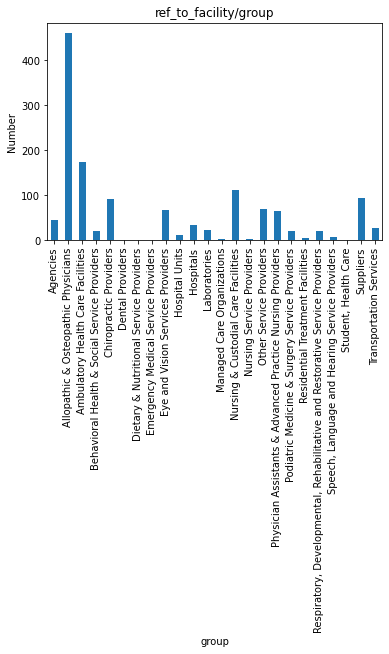

In [88]:
refto_from.groupby('ref_to_group')['ref_to_facility'].nunique().plot(kind="bar",
                                                             title = 'ref_to_facility/group', 
                                                             xlabel='group',
                                                             ylabel='Number')

<AxesSubplot:title={'center':'ref_from_facility/ref_to_facility'}, xlabel='group', ylabel='Number'>

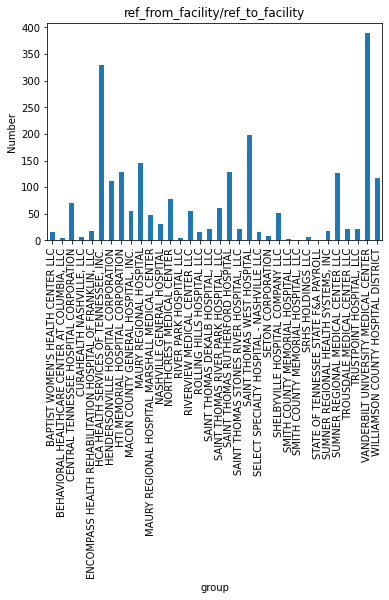

In [102]:
refto_from[refto_from ['ref_to_group'] == "Hospitals"].groupby('ref_to_facility')['ref_from_facility'].nunique().plot(kind="bar",
                                                             title = 'ref_from_facility/ref_to_facility', 
                                                             xlabel='group',
                                                             ylabel='Number')

In [4]:
query = """
SELECT * 
FROM npicode 
WHERE npi = 1093753303

"""
 ##npi not refering to vandy
with sqlite3.connect('data/hop_referal.sqlite') as db: 
     explo= pd.read_sql(query, db)
explo

,npi,entity_type_code,provider_organization_name_(legal_business_name),provider_last_name_(legal_name),provider_first_name,provider_middle_name,provider_name_prefix_text,provider_name_suffix_text,provider_credential_text,provider_first_line_business_practice_location_address,provider_second_line_business_practice_location_address,provider_business_practice_location_address_city_name,provider_business_practice_location_address_state_name,provider_business_practice_location_address_postal_code,taxonomy_code
0,1093753303,1.0,None,WELCH,DEREK,C.,DR.,None,M.D.,1010 AIRPARK CENTER DR,None,NASHVILLE,TN,372175200.0,207ZP0102X


In [85]:
refto_hosonly = refto_from[refto_from ['ref_to_group'] == "Hospitals"].groupby(['ref_to_facility','ref_from_facility'])['patient_count'].agg('sum').sort_values(ascending = False).to_frame()
refto_hosonly = refto_hosonly.reset_index()
refto_hosonly

refto_from.groupby(['ref_from_group', 'ref_to_group'])['patient_count'].agg('sum').sort_values(ascending =False).to_frame().reset_index()

,ref_from_group,ref_to_group,patient_count
0,Allopathic & Osteopathic Physicians,Allopathic & Osteopathic Physicians,14204637
1,Allopathic & Osteopathic Physicians,Hospitals,2238753
2,Hospitals,Allopathic & Osteopathic Physicians,2222269
3,Laboratories,Allopathic & Osteopathic Physicians,981326
4,Allopathic & Osteopathic Physicians,Laboratories,914910
...,...,...,...
292,Managed Care Organizations,"Respiratory, Developmental, Rehabilitative and...",27
293,"Respiratory, Developmental, Rehabilitative and...",Managed Care Organizations,27
294,Residential Treatment Facilities,Hospitals,26
295,Nursing Service Providers,Behavioral Health & Social Service Providers,22


In [38]:
refto_hosonly[refto_hosonly['ref_to_facility'] != 'VANDERBILT UNIVERSITY MEDICAL CENTER'].groupby('ref_from_facility')['patient_count'].sum().sort_values(ascending =False).to_frame()

,patient_count
ref_from_facility,
"ADVANCED DIAGNOSTIC IMAGING, PC",75314
RADIOLOGY ALLIANCE PC,54875
SAINT THOMAS MEDICAL PARTNERS,54594
TENNESSEE ONCOLOGY PLLC,41870
CENTENNIAL HEART LLC,39042
...,...
"NRA-MCMINNVILLE, TENNESSEE, LLC",24
SWEET DREAMS ANESTHESIA INC,24
"LITTLE FISH PHARMACY, LLC",19


In [64]:
tovandy = refto_hosonly[refto_hosonly['ref_to_facility'] == 'VANDERBILT UNIVERSITY MEDICAL CENTER'].groupby('ref_from_facility')['patient_count'].sum().sort_values(ascending =False).to_frame().reset_index()
tovandy
vandlist = tovandy['ref_from_facility'].to_list()
tovandy

,ref_from_facility,patient_count
0,VANDERBILT UNIVERSITY MEDICAL CENTER,70616
1,"ADVANCED DIAGNOSTIC IMAGING, PC",16302
2,SAINT THOMAS MEDICAL PARTNERS,9295
3,TENNESSEE ONCOLOGY PLLC,7367
4,RADIOLOGY ALLIANCE PC,6945
...,...,...
384,"RAI CARE CENTERS OF LEBANON I, LLC",25
385,"ASHOK K. MEHTA, MD, PC",25
386,DIALYSIS ASSOCIATES LLC,22
387,"PRECISION HEALTH CARE, INC",20


In [78]:
#df[~df.country.isin(countries_to_keep)]
# using ~ eliminates the content in the list from the search
not_ref_tovandy = refto_hosonly[~refto_hosonly.ref_from_facility. isin(vandlist)].reset_index()
not_ref_tovandy.groupby('ref_from_facility')['patient_count'].agg(sum).sort_values(ascending = False).to_frame()

not_ref_tovandy.groupby('ref_to_facility')['patient_count'].agg(sum).sort_values(ascending = False).to_frame()

,patient_count
ref_to_facility,
"HCA HEALTH SERVICES OF TENNESSEE, INC.",68143
SAINT THOMAS WEST HOSPITAL,30782
MAURY REGIONAL HOSPITAL,22782
SAINT THOMAS RUTHERFORD HOSPITAL,18467
HTI MEMORIAL HOSPITAL CORPORATION,17287
HENDERSONVILLE HOSPITAL CORPORATION,11792
SUMNER REGIONAL MEDICAL CENTER LLC,10937
"SAINT THOMAS RIVER PARK HOSPITAL, LLC",6975
WILLIAMSON COUNTY HOSPITAL DISTRICT,5397


In [80]:
#there are three network Acession, Vanderbilt, HCA
refto_from.head(2)
refto_from.shape ##(241849, 13)


refto_from[~refto_from.ref_from_facility. isin(vandlist)].reset_index().shape ##(181436, 14)

refto_from[~refto_from.ref_from_facility. isin(vandlist)].reset_index()

refto_from[~refto_from.ref_from_facility. isin(vandlist)].groupby('ref_to_facility')['patient_count'].agg(sum).sort_values(ascending = False)

ref_to_facility
VANDERBILT UNIVERSITY MEDICAL CENTER      1477686
ASSOCIATED PATHOLOGISTS, LLC              1272940
ASSOCIATED PATHOLOGISTS LLC                791853
PATHGROUP LABS, LLC                        763488
ADVANCED DIAGNOSTIC IMAGING, PC            733806
                                           ...   
MORNINGSIDE OF SPRINGFIELD, LLC                11
RACHEL B. DORRIS, LCSW, LLC                    11
SELECT PHYSICAL THERAPY HOLDINGS, INC.         11
SPRINGFIELD RESIDENTIAL, LLC                   11
FRANKLIN CHIROPRACTIC CENTER LLC               11
Name: patient_count, Length: 1300, dtype: int64

In [81]:
vandlist

['VANDERBILT UNIVERSITY MEDICAL CENTER',
 'ADVANCED DIAGNOSTIC IMAGING, PC',
 'SAINT THOMAS MEDICAL PARTNERS',
 'TENNESSEE ONCOLOGY PLLC',
 'RADIOLOGY ALLIANCE PC',
 'WILLIAMSON COUNTY HOSPITAL DISTRICT',
 'HERITAGE MEDICAL ASSOCIATES PC',
 'VANDERBILT IMAGING SERVICES, LLC',
 'ONE HUNDRED OAKS IMAGING,LLC',
 'UROLOGY ASSOCIATES PC',
 'TENNESSEE ORTHOPAEDIC ALLIANCE PA',
 'MAURY REGIONAL HOSPITAL',
 'WILLIAMSON IMAGING, LLC',
 'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
 'HCA HEALTH SERVICES OF TENNESSEE, INC.',
 'PCA OF COLUMBIA, INC.',
 'SOUTHERN RADIOLOGY ASSOCIATES, PLLC',
 'SOLOMON EMERGENCY PHYSICIANS PLLC',
 'NEPHROLOGY ASSOCIATES, PC',
 'AGILITAS USA INC',
 'METROPOLITAN GOVERNMENT OF NASHVILLE AND DAVIDSON COUNTY',
 'MURFREESBORO MEDICAL CLINIC',
 'MAURY REGIONAL MEDICAL GROUP, INC',
 'WILLIAMSON MEDICAL GROUP, LLC',
 'STAR PHYSICAL THERAPY LP',
 'EMERGI-TRUST',
 'MEDICAL NECESSITIES & SERVICES LLC',
 'TENNESSEE RETINA PC',
 'SAINT THOMAS RUTHERFOR

In [88]:
refto_from.columns

Index(['ref_to_npi', 'ref_to_facility', 'ref_to_group',
       'ref_to_classification', 'ref_to_speciality', 'refered_from_npi',
       'patient_count', 'transaction_count', 'ref_from_taxcode',
       'ref_from_facility', 'ref_from_group', 'ref_from_classification',
       'ref_from_speciality'],
      dtype='object')

In [91]:
refto_from.head(2)

,ref_to_npi,ref_to_facility,ref_to_group,ref_to_classification,ref_to_speciality,refered_from_npi,patient_count,transaction_count,ref_from_taxcode,ref_from_facility,ref_from_group,ref_from_classification,ref_from_speciality
0,1457340184,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1376626762,96,248,207K00000X,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN
1,1932191855,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1437194669,35,50,207R00000X,SAINT THOMAS MEDICAL PARTNERS,Allopathic & Osteopathic Physicians,Internal Medicine,NaN


In [112]:
refto_from = pd.read_csv('data/npi_to_from.csv')
refto_from.head(2)

,ref_to_npi,ref_to_facility,ref_to_group,ref_to_classification,ref_to_speciality,refered_from_npi,patient_count,transaction_count,ref_from_taxcode,ref_from_facility,ref_from_group,ref_from_classification,ref_from_speciality
0,1457340184,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1376626762,96,248,207K00000X,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN
1,1932191855,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1437194669,35,50,207R00000X,SAINT THOMAS MEDICAL PARTNERS,Allopathic & Osteopathic Physicians,Internal Medicine,NaN


In [123]:
comid = pd.read_csv('data/hop_team_commid.csv')
comid.shape #(41188, 2)
comid['communityId'].value_counts() #total number of community 355
comid.columns

Index(['npi', 'communityId'], dtype='object')

In [114]:
refto_from = pd.merge(refto_from, comid, how="left", left_on="ref_to_npi", right_on="npi").rename(columns={'communityId': "ref_to_commid"})

# refto_from.head(2)

In [119]:
refto_from = (
    pd.merge(refto_from, comid, how="left", left_on="refered_from_npi", right_on="npi")
    .rename(columns={'communityId': "ref_from_commid"})
    .drop(columns=['npi_x', 'npi_y'])
)

In [120]:
refto_from.head(5)

,ref_to_npi,ref_to_facility,ref_to_group,ref_to_classification,ref_to_speciality,refered_from_npi,patient_count,transaction_count,ref_from_taxcode,ref_from_facility,ref_from_group,ref_from_classification,ref_from_speciality,ref_to_commid,ref_from_commid
0,1457340184,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1376626762,96,248,207K00000X,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,7,7
1,1932191855,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1437194669,35,50,207R00000X,SAINT THOMAS MEDICAL PARTNERS,Allopathic & Osteopathic Physicians,Internal Medicine,NaN,363,9
2,1932191855,NaN,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1295773984,111,265,207K00000X,BRUCE L WOLF MD,Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,363,363
3,1376626762,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1538153937,33,62,207X00000X,TENNESSEE ORTHOPAEDIC ALLIANCE PA,Allopathic & Osteopathic Physicians,Orthopaedic Surgery,NaN,7,9
4,1376626762,"THE ALLERGY AND ASTHMA CENTER, P.C.",Allopathic & Osteopathic Physicians,Allergy & Immunology,NaN,1437194669,48,61,207R00000X,SAINT THOMAS MEDICAL PARTNERS,Allopathic & Osteopathic Physicians,Internal Medicine,NaN,7,9


In [122]:
refto_from.to_csv('data/smita_hop.csv', index=False)

from Hayden
hos_refferals[['from_classification', 'patient_count']].groupby(by = ['from_classification'], dropna = False
                                                                     ).sum().rename(columns={"patient_count": "patient_totals"}
                                                                                   ).reset_index()

In [126]:
refto_from[refto_from['ref_to_facility'] != 'VANDERBILT UNIVERSITY MEDICAL CENTER'].groupby('ref_from_group')['patient_count'].sum().sort_values(ascending =False).to_frame()

,patient_count
ref_from_group,
Allopathic & Osteopathic Physicians,19007337
Hospitals,2730055
Laboratories,1351124
Physician Assistants & Advanced Practice Nursing Providers,1206518
Other Service Providers,1111901
Transportation Services,427822
Ambulatory Health Care Facilities,395360
Suppliers,283781
Podiatric Medicine & Surgery Service Providers,141649


In [127]:
refto_from[refto_from['ref_to_facility'] != 'VANDERBILT UNIVERSITY MEDICAL CENTER'].groupby('ref_from_classification')['patient_count'].sum().sort_values(ascending =False).to_frame()

,patient_count
ref_from_classification,
Internal Medicine,7526173
Radiology,4250117
General Acute Care Hospital,2703831
Pathology,2029961
Clinical Medical Laboratory,1350251
...,...
Independent Medical Examiner,63
Personal Emergency Response Attendant,53
Clinical Pharmacology,44


In [129]:
refto_from[refto_from['ref_to_facility'] != 'VANDERBILT UNIVERSITY MEDICAL CENTER'].groupby('ref_from_speciality')['patient_count'].sum().sort_values(ascending =False).to_frame().head(50)

,patient_count
ref_from_speciality,
Diagnostic Radiology,4098018
Anatomic Pathology & Clinical Pathology,1928832
Cardiovascular Disease,918946
Hematology & Oncology,811487
Nephrology,456956
Family,339178
Pulmonary Disease,291306
Land Transport,281566
Gastroenterology,219880


In [134]:
refto_from[( refto_from['ref_from_speciality'] == 'Cardiovascular Disease') & (refto_from['ref_to_group'] == 'Hospitals')].groupby('ref_to_facility')['patient_count'].sum().sort_values(ascending =False).to_frame()

,patient_count
ref_to_facility,
VANDERBILT UNIVERSITY MEDICAL CENTER,56213
SAINT THOMAS WEST HOSPITAL,21668
"HCA HEALTH SERVICES OF TENNESSEE, INC.",20063
WILLIAMSON COUNTY HOSPITAL DISTRICT,13306
HENDERSONVILLE HOSPITAL CORPORATION,6314
SUMNER REGIONAL MEDICAL CENTER LLC,6170
MAURY REGIONAL HOSPITAL,5847
SAINT THOMAS RUTHERFORD HOSPITAL,4975
HTI MEMORIAL HOSPITAL CORPORATION,4306


In [153]:
refto_from[refto_from['ref_to_group']== 'Hospitals']['ref_to_facility'].value_counts()/len(refto_from)*100

VANDERBILT UNIVERSITY MEDICAL CENTER                         1.663021
HCA HEALTH SERVICES OF TENNESSEE, INC.                       1.068849
SAINT THOMAS WEST HOSPITAL                                   0.721938
MAURY REGIONAL HOSPITAL                                      0.382057
SAINT THOMAS RUTHERFORD HOSPITAL                             0.255945
WILLIAMSON COUNTY HOSPITAL DISTRICT                          0.220385
HTI MEMORIAL HOSPITAL CORPORATION                            0.218732
HENDERSONVILLE HOSPITAL CORPORATION                          0.187307
SUMNER REGIONAL MEDICAL CENTER LLC                           0.185653
CENTRAL TENNESSEE HOSPITAL CORPORATION                       0.141824
NORTHCREST MEDICAL CENTER                                    0.114121
SAINT THOMAS RIVER PARK HOSPITAL, LLC                        0.107505
SHELBYVILLE HOSPITAL COMPANY LLC                             0.072359
MAURY REGIONAL HOSPITAL MARSHALL MEDICAL CENTER              0.070292
MACON COUNTY GENERAL

In [167]:
refto_from['ref_to_facility'].isin(["SAINT THOMAS"]).value_counts()

False    241849
Name: ref_to_facility, dtype: int64

In [137]:
refto_from['ref_to_facility'].nunique() #total number of facility = 1327
refto_from['ref_from_facility'].nunique() #total number of facility = 1273

1273

In [140]:
refto_from['patient_count'].sum() #total number of patients =40588503

refto_from['ref_to_facility'].value_counts()

VANDERBILT UNIVERSITY MEDICAL CENTER       9337
TENNESSEE ONCOLOGY PLLC                    5559
ASSOCIATED PATHOLOGISTS, LLC               5528
PATHGROUP LABS, LLC                        4177
SAINT THOMAS MEDICAL PARTNERS              3661
                                           ... 
FRED R SHANKS, O.D., LLC                      1
FAMILY VISION CARE OF COOL SPRINGS, LLC       1
WILLIAM C SMITH II OD PC                      1
HUGHES MCDANIEL & ASSOCIATES PLC              1
SILVER HILL MEDICAL CLINIC                    1
Name: ref_to_facility, Length: 1327, dtype: int64

In [171]:
refto_from[refto_from['ref_to_facility']== 'VANDERBILT UNIVERSITY MEDICAL CENTER']['ref_to_npi'].unique()

array([1104202761, 1053449660, 1972027159, 1740319847, 1821030842,
       1215979190, 1306889597, 1396882205, 1558408633, 1649637794,
       1285091330], dtype=int64)

In [172]:
refto_from[refto_from['ref_to_facility']== 'VANDERBILT UNIVERSITY MEDICAL CENTER']['ref_to_commid' ].unique()

array([11117,     9], dtype=int64)

In [185]:
refto_from[(refto_from['ref_to_facility'].isin(["VANDERBILT CHILDREN'S", 'VANDERBILT CHILDRENS HOSPITAL',
       'VANDERBILT MEDICAL CENTER', 'VANDERBILT UNIVERSITY',
       'VANDERBILT UNIVERSITY MEDICAL CENTER', 'CONCENTRA VANDERBILT LLC',
       "MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL",
       'VANDERBILT PSYCHIATRIC HOSPITAL, LLC',
       'VANDERBILT HEART AND VASCULAR INSTITUTE',
       'VANDERBILT ORTHOPAEDIC INSTITUTE',
       'DOUGLAS L. VANDERBILT, M.D. ,P.C.',
       'VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC',
       'VANDERBILT HOSPITAL', 'VANDERBILT IMAGING SERVICES, LLC',
       "MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDERBILT",
       'VANDERBILT UNIVERSITY HOSPITAL',
       'VANDERBILT ORTHOPAEDICS AND REHABILITATION COOL SPRINGS',
       "VANDERBILT CHILDREN'S HOSPITAL PHARMACY",
       'VANDERBILT PSYCHIATRIC HOSPITAL',
       'VANDERBILT ST. THOMAS IMAGING, GP',
       'VANDERBILT HEALTH PHARMACY GROUP LLC',
       'VANDERBILT HOME CARE SERVICES, LLC',
       'VANDERBILT UNIVERSITY MEDICAL SCHOOL',
       'VANDERBILT UNIV. MEDICAL CENTER',
       'VANDERBILT ASTHMA SINUS ALLERGY PROGRAM',
       'VANDERBILT COMMUNITY MENTAL HEALTH CENTER',
       'VANDERBILT COMMUNITY AND HOME SERVICES',
       'VANDERBILT BEDFORD HOSPITAL, LLC',
       'VANDERBILT COFFEE HOSPITAL, LLC',
       'VANDERBILT INTEGRATED PROVIDERS, LLC',
       'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
       'VANDERBILT-INGRAM CANCER CENTER AT TENNOVA HEALTHCARE-CLARKSVILLE',
       'VANDERBILT MAURY RADIATION ONCOLOGY, LLC']))]

,ref_to_npi,ref_to_facility,ref_to_group,ref_to_classification,ref_to_speciality,refered_from_npi,patient_count,transaction_count,ref_from_taxcode,ref_from_facility,ref_from_group,ref_from_classification,ref_from_speciality,ref_to_commid,ref_from_commid
52976,1225135551,VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTE...,Allopathic & Osteopathic Physicians,Internal Medicine,NaN,1518959311,579,691,207Q00000X,NaN,Allopathic & Osteopathic Physicians,Family Medicine,NaN,11117,11117
52977,1225135551,VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTE...,Allopathic & Osteopathic Physicians,Internal Medicine,NaN,1528354214,130,137,363LF0000X,NaN,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,11117,11117
52978,1225135551,VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTE...,Allopathic & Osteopathic Physicians,Internal Medicine,NaN,1790040947,76,76,2085R0202X,NaN,Allopathic & Osteopathic Physicians,Radiology,Diagnostic Radiology,11117,11117
52979,1225135551,VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTE...,Allopathic & Osteopathic Physicians,Internal Medicine,NaN,1780812289,183,189,2085R0202X,NaN,Allopathic & Osteopathic Physicians,Radiology,Diagnostic Radiology,11117,11117
52980,1225135551,VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTE...,Allopathic & Osteopathic Physicians,Internal Medicine,NaN,1811007974,239,259,363LF0000X,NaN,Physician Assistants & Advanced Practice Nursi...,Nurse Practitioner,Family,11117,11117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238197,1285091330,VANDERBILT UNIVERSITY MEDICAL CENTER,Suppliers,Pharmacy,Community/Retail Pharmacy,1972548089,23,87,NaN,NaN,NaN,NaN,NaN,11117,7
238198,1285091330,VANDERBILT UNIVERSITY MEDICAL CENTER,Suppliers,Pharmacy,Community/Retail Pharmacy,1386731404,86,108,207RC0000X,NaN,Allopathic & Osteopathic Physicians,Internal Medicine,Cardiovascular Disease,11117,11117
238199,1285091330,VANDERBILT UNIVERSITY MEDICAL CENTER,Suppliers,Pharmacy,Community/Retail Pharmacy,1396882205,1194,5359,282N00000X,VANDERBILT UNIVERSITY MEDICAL CENTER,Hospitals,General Acute Care Hospital,NaN,11117,11117
238200,1285091330,VANDERBILT UNIVERSITY MEDICAL CENTER,Suppliers,Pharmacy,Community/Retail Pharmacy,1407948821,18,58,204F00000X,NaN,Allopathic & Osteopathic Physicians,Transplant Surgery,NaN,11117,11117


In [188]:
refto_from[(refto_from['ref_to_facility'].isin(["VANDERBILT CHILDREN'S", 'VANDERBILT CHILDRENS HOSPITAL',
       'VANDERBILT MEDICAL CENTER', 'VANDERBILT UNIVERSITY',
       'VANDERBILT UNIVERSITY MEDICAL CENTER', 'CONCENTRA VANDERBILT LLC',
       "MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL",
       'VANDERBILT PSYCHIATRIC HOSPITAL, LLC',
       'VANDERBILT HEART AND VASCULAR INSTITUTE',
       'VANDERBILT ORTHOPAEDIC INSTITUTE',
       'DOUGLAS L. VANDERBILT, M.D. ,P.C.',
       'VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC',
       'VANDERBILT HOSPITAL', 'VANDERBILT IMAGING SERVICES, LLC',
       "MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDERBILT",
       'VANDERBILT UNIVERSITY HOSPITAL',
       'VANDERBILT ORTHOPAEDICS AND REHABILITATION COOL SPRINGS',
       "VANDERBILT CHILDREN'S HOSPITAL PHARMACY",
       'VANDERBILT PSYCHIATRIC HOSPITAL',
       'VANDERBILT ST. THOMAS IMAGING, GP',
       'VANDERBILT HEALTH PHARMACY GROUP LLC',
       'VANDERBILT HOME CARE SERVICES, LLC',
       'VANDERBILT UNIVERSITY MEDICAL SCHOOL',
       'VANDERBILT UNIV. MEDICAL CENTER',
       'VANDERBILT ASTHMA SINUS ALLERGY PROGRAM',
       'VANDERBILT COMMUNITY MENTAL HEALTH CENTER',
       'VANDERBILT COMMUNITY AND HOME SERVICES',
       'VANDERBILT BEDFORD HOSPITAL, LLC',
       'VANDERBILT COFFEE HOSPITAL, LLC',
       'VANDERBILT INTEGRATED PROVIDERS, LLC',
       'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
       'VANDERBILT-INGRAM CANCER CENTER AT TENNOVA HEALTHCARE-CLARKSVILLE',
       'VANDERBILT MAURY RADIATION ONCOLOGY, LLC']))]['ref_from_commid'].value_counts()



11117    4536
9        1179
83        771
328       614
7         610
363       515
31        269
11137     222
2528      197
40581     148
76        110
2294      109
1509       70
1451       58
283        33
40941      29
5556        5
16677       5
127         2
40517       2
11879       2
40506       2
28710       1
8261        1
18052       1
1202        1
10742       1
28815       1
5           1
28746       1
Name: ref_from_commid, dtype: int64

In [199]:
refto_from[(refto_from['ref_to_facility'].isin(['SAINT THOMAS OUTPATIENT NEUROSURGICAL CENTER',
       'SAINT THOMAS OUTPATIENT CARDIAC CATHETERIZATION CENTER, LLC',
       'WILLIAMSON SAINT THOMAS COMMUNITY HEALTH', 'SAINT THOMAS HEART',
       'SAINT THOMAS HEALTH',
       'SAINT THOMAS EMERGENCY MEDICAL SERVICES, LLC',
       'SAINT THOMAS WEST HOSPITAL', 'SAINT THOMAS HOME HEALTH',
       'SAINT THOMAS MEDICAL PARTNERS',
       'SAINT THOMAS CAMPUS SURGICARE LP',
       'SAINT THOMAS HOME RECOVERY CARE, LLC',
       'SAINT THOMAS DEKALB HOSPITAL, LLC',
       'SAINT THOMAS STONES RIVER HOSPITAL, LLC',
       'SAINT THOMAS HICKMAN HOSPITAL',
       'SAINT THOMAS HIGHLANDS HOSPITAL, LLC',
       'SAINT THOMAS RIVER PARK HOSPITAL, LLC',
       'SAINT THOMAS RUTHERFORD HOSPITAL',
       'SAINT THOMAS RUTHERFORD HOSPITAL LAB',
       'SAINT THOMAS WEST HOSPITAL LAB', 'SAINT THOMAS NETWORK',
       'CENTRAL SETON SAINT THOMAS HEALTH SERVICES',
       'SAINT THOMAS CARDIOLOGY CONSULTANTS, PC',
       'ASCENSION SAINT THOMAS LEBANON SURGERY CENTER LLC',
       'SAINT THOMAS SURGERY CENTER NEW SALEM, LLC',
       'SAINT THOMAS HOME HEALTH, LLC',
       'SAINT THOMAS REHABILITATION HOSPITAL, LLC']))]['ref_from_commid'].value_counts()

9        3038
363      1094
83        634
328       405
7         371
2528      285
11117     284
31        207
40581     152
11137     111
2294       69
1509       42
283        29
76         25
1451       25
40941       8
40362       4
127         4
5556        3
40301       2
11879       1
59          1
Name: ref_from_commid, dtype: int64

Saint Thomas has two communities 5924 and 9 

In [219]:
refto_from['ref_from_commid'].nunique() #355

refto_from[refto_from['ref_to_commid']== 83]['ref_to_facility'].value_counts().sort_values(ascending =False).to_frame().head(10)

,ref_to_facility
RADIOLOGY ALLIANCE PC,2835
"HCA HEALTH SERVICES OF TENNESSEE, INC.",2738
"ANESTHESIA MEDICAL GROUP, PC",1937
"NEPHROLOGY ASSOCIATES, PC",1843
CENTENNIAL HEART LLC,1780
THE SURGICAL CLINIC PLLC,682
COLUMBIA MEDICAL GROUP - THE FRIST CLINIC INC,679
HTI MEMORIAL HOSPITAL CORPORATION,615
METROPOLITAN GOVERNMENT OF NASHVILLE AND DAVIDSON COUNTY,574
"FIRST CALL AMBULANCE SERVICE, LLC",479


In [288]:
(
    ((refto_from.groupby(['ref_from_commid', 'ref_to_commid'])['patient_count'].sum())/(refto_from['patient_count'].sum())*100)
    .sort_values(ascending =False)
    .to_frame().rename(columns={'patient_count': '%of total patient_count', 
                                'ref_from_commid': 'Referred_From_Community#',
                               'ref_to_commid': 'Referred_To_Community#' })
    .head(10)
)

,,%of total patient_count
ref_from_commid,ref_to_commid,
83,83,17.185416
9,9,12.863655
7,7,12.364223
11117,11117,6.625891
328,328,5.404479
363,363,4.671399
2294,2294,3.611348
83,9,1.931835
9,83,1.918267


In [290]:
(
    ((refto_from.groupby(['ref_from_commid', 'ref_to_commid', 'ref_to_speciality'])['patient_count'].sum())/(refto_from['patient_count'].sum())*100)
    .sort_values(ascending =False)
    .to_frame().rename(columns={'patient_count': '%of total patient_count', 
                                'ref_from_commid': 'Referred_From_Community#',
                               'ref_to_commid': 'Referred_To_Community#' })
    .head(10)
)

,,,%of total patient_count
ref_from_commid,ref_to_commid,ref_to_speciality,
7,7,Anatomic Pathology & Clinical Pathology,6.309932
83,83,Diagnostic Radiology,3.829616
9,9,Diagnostic Radiology,1.925964
328,328,Diagnostic Radiology,1.228722
363,363,Hematology & Oncology,1.071715
11117,11117,Diagnostic Radiology,0.943546
83,83,Cardiovascular Disease,0.759198
363,363,Diagnostic Radiology,0.751710
9,9,Cardiovascular Disease,0.728933


In [222]:
refto_from[(refto_from['ref_to_facility'].isin(["VANDERBILT CHILDREN'S", 'VANDERBILT CHILDRENS HOSPITAL',
       'VANDERBILT MEDICAL CENTER', 'VANDERBILT UNIVERSITY',
       'VANDERBILT UNIVERSITY MEDICAL CENTER', 'CONCENTRA VANDERBILT LLC',
       "MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL",
       'VANDERBILT PSYCHIATRIC HOSPITAL, LLC',
       'VANDERBILT HEART AND VASCULAR INSTITUTE',
       'VANDERBILT ORTHOPAEDIC INSTITUTE',
       'DOUGLAS L. VANDERBILT, M.D. ,P.C.',
       'VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC',
       'VANDERBILT HOSPITAL', 'VANDERBILT IMAGING SERVICES, LLC',
       "MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDERBILT",
       'VANDERBILT UNIVERSITY HOSPITAL',
       'VANDERBILT ORTHOPAEDICS AND REHABILITATION COOL SPRINGS',
       "VANDERBILT CHILDREN'S HOSPITAL PHARMACY",
       'VANDERBILT PSYCHIATRIC HOSPITAL',
       'VANDERBILT ST. THOMAS IMAGING, GP',
       'VANDERBILT HEALTH PHARMACY GROUP LLC',
       'VANDERBILT HOME CARE SERVICES, LLC',
       'VANDERBILT UNIVERSITY MEDICAL SCHOOL',
       'VANDERBILT UNIV. MEDICAL CENTER',
       'VANDERBILT ASTHMA SINUS ALLERGY PROGRAM',
       'VANDERBILT COMMUNITY MENTAL HEALTH CENTER',
       'VANDERBILT COMMUNITY AND HOME SERVICES',
       'VANDERBILT BEDFORD HOSPITAL, LLC',
       'VANDERBILT COFFEE HOSPITAL, LLC',
       'VANDERBILT INTEGRATED PROVIDERS, LLC',
       'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
       'VANDERBILT-INGRAM CANCER CENTER AT TENNOVA HEALTHCARE-CLARKSVILLE',
       'VANDERBILT MAURY RADIATION ONCOLOGY, LLC']))].groupby(['ref_from_commid'])['patient_count'].sum().sort_values(ascending =False).to_frame()

,patient_count
ref_from_commid,
11117,1180467
9,286907
328,151351
83,122979
7,78398
363,77659
31,41880
11137,41192
2528,21169


In [228]:
refto_from[refto_from['ref_to_commid']== 83]['ref_to_facility'].nunique() #246

refto_from[refto_from['ref_from_commid']== 83].groupby(['ref_from_facility'])['patient_count'].sum().sort_values(ascending =False).to_frame().tail(30)

,patient_count
ref_from_facility,
GGNSC SPRINGFIELD LLC,162
"LIFELINE HOME HEALTH CARE OF SPRINGFIELD, LLC",160
STEWART MENTAL HEALTH,158
TENNESSEE BREAST CARE CENTER PLC,155
PARKS PRACTITIONER AND CONSULTING SERVICES LLC,155
"NASHVILLE PLASTIC SURGERY INSTITUTE, PLLC",138
TOTAL RENAL CARE INC,116
MISTYE TAYLOR MD PLLC,112
"ADAMSPLACE, LLC",111


In [431]:
(((refto_from[refto_from['ref_from_commid']== 83].groupby(['ref_from_speciality'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).sort_values(ascending=False).to_frame().head(40)

,patient_count
ref_from_speciality,
Diagnostic Radiology,4.403168
Cardiovascular Disease,0.942888
Nephrology,0.809352
Interventional Cardiology,0.418705
Pulmonary Disease,0.334639
Land Transport,0.304027
Gastroenterology,0.212866
Neurology,0.212508
Family,0.174372


In [278]:
#68 speciality
(((refto_from[refto_from['ref_from_commid']== 83].groupby(['ref_from_speciality'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).sort_values(ascending=False).to_frame().head(10)

,patient_count
ref_from_speciality,
Diagnostic Radiology,4.403168
Cardiovascular Disease,0.942888
Nephrology,0.809352
Interventional Cardiology,0.418705
Pulmonary Disease,0.334639
Land Transport,0.304027
Gastroenterology,0.212866
Neurology,0.212508
Family,0.174372


<AxesSubplot:title={'center':'20 most Referred specilaities from cluste 83'}, xlabel='speciality', ylabel='% of total patient number in cbsa 34980'>

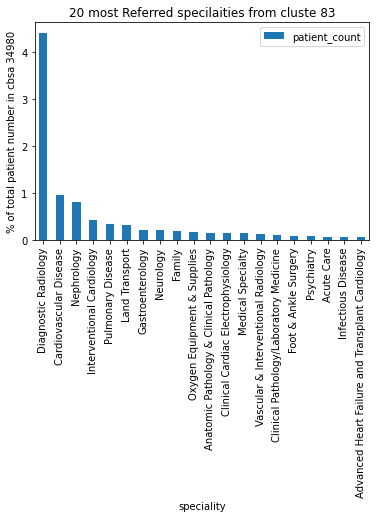

In [271]:

(((refto_from[refto_from['ref_from_commid']== 83].groupby(['ref_from_speciality'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).sort_values(ascending=False).to_frame().head(20).plot(kind="bar", 
title = '20 most Referred specilaities from cluste 83', xlabel='speciality', ylabel='% of total patient number in cbsa 34980', )

<AxesSubplot:title={'center':'20 least referred specilaities from cluste 83'}, xlabel='speciality', ylabel='% of total patient number in cbsa 34980'>

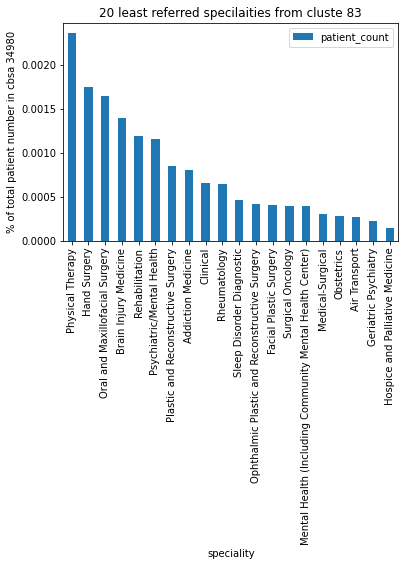

In [275]:

(((refto_from[refto_from['ref_from_commid']== 83].groupby(['ref_from_speciality'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).sort_values(ascending=False).to_frame().tail(20).plot(kind="bar", 
title = '20 least referred specilaities from cluste 83', xlabel='speciality', ylabel='% of total patient number in cbsa 34980', )

<AxesSubplot:title={'center':'20 least Referred speciality from cluste 83 into VUMC'}, xlabel='Referred speciality in VUMC', ylabel='% of total patient number in cbsa 34980'>

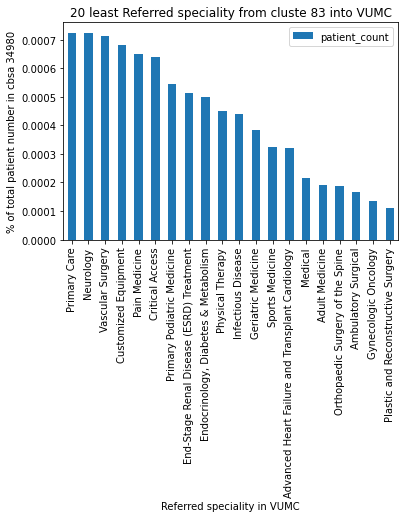

In [270]:

(((refto_from[(refto_from['ref_from_commid']== 83) & (refto_from['ref_to_facility'].isin(["VANDERBILT CHILDREN'S", 'VANDERBILT CHILDRENS HOSPITAL',
       'VANDERBILT MEDICAL CENTER', 'VANDERBILT UNIVERSITY',
       'VANDERBILT UNIVERSITY MEDICAL CENTER', 'CONCENTRA VANDERBILT LLC',
       "MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL",
       'VANDERBILT PSYCHIATRIC HOSPITAL, LLC',
       'VANDERBILT HEART AND VASCULAR INSTITUTE',
       'VANDERBILT ORTHOPAEDIC INSTITUTE',
       'DOUGLAS L. VANDERBILT, M.D. ,P.C.',
       'VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC',
       'VANDERBILT HOSPITAL', 'VANDERBILT IMAGING SERVICES, LLC',
       "MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDERBILT",
       'VANDERBILT UNIVERSITY HOSPITAL',
       'VANDERBILT ORTHOPAEDICS AND REHABILITATION COOL SPRINGS',
       "VANDERBILT CHILDREN'S HOSPITAL PHARMACY",
       'VANDERBILT PSYCHIATRIC HOSPITAL',
       'VANDERBILT ST. THOMAS IMAGING, GP',
       'VANDERBILT HEALTH PHARMACY GROUP LLC',
       'VANDERBILT HOME CARE SERVICES, LLC',
       'VANDERBILT UNIVERSITY MEDICAL SCHOOL',
       'VANDERBILT UNIV. MEDICAL CENTER',
       'VANDERBILT ASTHMA SINUS ALLERGY PROGRAM',
       'VANDERBILT COMMUNITY MENTAL HEALTH CENTER',
       'VANDERBILT COMMUNITY AND HOME SERVICES',
       'VANDERBILT BEDFORD HOSPITAL, LLC',
       'VANDERBILT COFFEE HOSPITAL, LLC',
       'VANDERBILT INTEGRATED PROVIDERS, LLC',
       'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
       'VANDERBILT-INGRAM CANCER CENTER AT TENNOVA HEALTHCARE-CLARKSVILLE',
       'VANDERBILT MAURY RADIATION ONCOLOGY, LLC']))].groupby(['ref_from_speciality'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).sort_values(ascending=False).to_frame().tail(20).plot(kind="bar", 
title = '20 least Referred speciality from cluste 83 into VUMC', xlabel='Referred speciality in VUMC', ylabel='% of total patient number in cbsa 34980')

<AxesSubplot:title={'center':'20 most Referred specilaity from cluste 83 into VUMC'}, xlabel='Referred speciality in VUMC', ylabel='% of total patient number in cbsa 34980'>

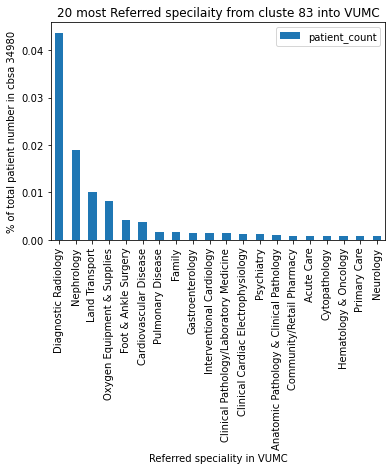

In [300]:
(((refto_from[(refto_from['ref_from_commid']== 83) & (refto_from['ref_to_facility'].isin(["VANDERBILT CHILDREN'S", 'VANDERBILT CHILDRENS HOSPITAL',
       'VANDERBILT MEDICAL CENTER', 'VANDERBILT UNIVERSITY',
       'VANDERBILT UNIVERSITY MEDICAL CENTER', 'CONCENTRA VANDERBILT LLC',
       "MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL",
       'VANDERBILT PSYCHIATRIC HOSPITAL, LLC',
       'VANDERBILT HEART AND VASCULAR INSTITUTE',
       'VANDERBILT ORTHOPAEDIC INSTITUTE',
       'DOUGLAS L. VANDERBILT, M.D. ,P.C.',
       'VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC',
       'VANDERBILT HOSPITAL', 'VANDERBILT IMAGING SERVICES, LLC',
       "MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDERBILT",
       'VANDERBILT UNIVERSITY HOSPITAL',
       'VANDERBILT ORTHOPAEDICS AND REHABILITATION COOL SPRINGS',
       "VANDERBILT CHILDREN'S HOSPITAL PHARMACY",
       'VANDERBILT PSYCHIATRIC HOSPITAL',
       'VANDERBILT ST. THOMAS IMAGING, GP',
       'VANDERBILT HEALTH PHARMACY GROUP LLC',
       'VANDERBILT HOME CARE SERVICES, LLC',
       'VANDERBILT UNIVERSITY MEDICAL SCHOOL',
       'VANDERBILT UNIV. MEDICAL CENTER',
       'VANDERBILT ASTHMA SINUS ALLERGY PROGRAM',
       'VANDERBILT COMMUNITY MENTAL HEALTH CENTER',
       'VANDERBILT COMMUNITY AND HOME SERVICES',
       'VANDERBILT BEDFORD HOSPITAL, LLC',
       'VANDERBILT COFFEE HOSPITAL, LLC',
       'VANDERBILT INTEGRATED PROVIDERS, LLC',
       'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
       'VANDERBILT-INGRAM CANCER CENTER AT TENNOVA HEALTHCARE-CLARKSVILLE',
       'VANDERBILT MAURY RADIATION ONCOLOGY, LLC']))].groupby(['ref_from_speciality'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).sort_values(ascending=False).to_frame().head(20).plot(kind="bar", 
title = '20 most Referred specilaity from cluste 83 into VUMC', xlabel='Referred speciality in VUMC', ylabel='% of total patient number in cbsa 34980')

In [291]:
refto_from['ref_to_speciality'].value_counts() #161

Diagnostic Radiology                       27196
Anatomic Pathology & Clinical Pathology    12950
Cardiovascular Disease                      7933
Hematology & Oncology                       7652
Nephrology                                  5774
                                           ...  
Occupational Health                            1
Pediatric Allergy/Immunology                   1
Internist                                      1
Physical Rehabilitation                        1
Neurocritical Care                             1
Name: ref_to_speciality, Length: 161, dtype: int64

In [320]:
refto_from[(refto_from['ref_from_commid']== 83)]['ref_to_speciality'].unique()

array([nan, 'Allergy', 'Critical Care Medicine', 'Pain Medicine',
       'Dermatopathology', 'MOHS-Micrographic Surgery',
       'Emergency Medical Services', 'Pediatric Emergency Medicine',
       'Addiction Medicine', 'Adult Medicine', 'Geriatric Medicine',
       'Hospice and Palliative Medicine', 'Sports Medicine',
       'Advanced Heart Failure and Transplant Cardiology',
       'Allergy & Immunology', 'Cardiovascular Disease',
       'Clinical Cardiac Electrophysiology',
       'Endocrinology, Diabetes & Metabolism', 'Gastroenterology',
       'Hematology', 'Hematology & Oncology', 'Infectious Disease',
       'Interventional Cardiology', 'Medical Oncology', 'Nephrology',
       'Pulmonary Disease', 'Rheumatology', 'Sleep Medicine',
       'Female Pelvic Medicine and Reconstructive Surgery',
       'Gynecologic Oncology', 'Gynecology', 'Obstetrics',
       'Ophthalmic Plastic and Reconstructive Surgery',
       'Retina Specialist', 'Adult Reconstructive Orthopaedic Surgery',
    

In [315]:

(((refto_from[(refto_from['ref_from_commid']== 83) & (refto_from['ref_to_speciality'].isin(['Allergy', 'Critical Care Medicine', 'Pain Medicine',
       'Dermatopathology', 'MOHS-Micrographic Surgery',
       'Emergency Medical Services', 'Pediatric Emergency Medicine',
       'Addiction Medicine', 'Adult Medicine', 'Geriatric Medicine',
       'Hospice and Palliative Medicine', 'Sports Medicine',
       'Advanced Heart Failure and Transplant Cardiology',
       'Allergy & Immunology', 'Cardiovascular Disease',
       'Clinical Cardiac Electrophysiology',
       'Endocrinology, Diabetes & Metabolism', 'Gastroenterology',
       'Hematology', 'Hematology & Oncology', 'Infectious Disease',
       'Interventional Cardiology', 'Medical Oncology', 'Nephrology',
       'Pulmonary Disease', 'Rheumatology', 'Sleep Medicine',
       'Female Pelvic Medicine and Reconstructive Surgery',
       'Gynecologic Oncology', 'Gynecology', 'Obstetrics',
       'Ophthalmic Plastic and Reconstructive Surgery',
       'Retina Specialist', 'Adult Reconstructive Orthopaedic Surgery',
       'Foot and Ankle Surgery', 'Hand Surgery',
       'Orthopaedic Surgery of the Spine', 'Orthopaedic Trauma',
       'Facial Plastic Surgery', 'Plastic Surgery within the Head & Neck',
       'Interventional Pain Medicine',
       'Anatomic Pathology & Clinical Pathology',
       'Clinical Pathology/Laboratory Medicine', 'Cytopathology',
       'Brain Injury Medicine', 'Geriatric Psychiatry', 'Neurology',
       'Psychiatry', 'Diagnostic Radiology', 'Neuroradiology',
       'Pediatric Radiology', 'Radiation Oncology',
       'Therapeutic Radiology', 'Vascular & Interventional Radiology',
       'Plastic and Reconstructive Surgery', 'Surgery of the Hand',
       'Surgical Oncology', 'Trauma Surgery', 'Vascular Surgery',
       'Mental Health', 'Clinical', 'Clinical Child & Adolescent',
       'Counseling', 'Prescribing (Medical)',
       'Oral and Maxillofacial Surgery', 'Gerontology', 'Pain Management',
       'Acute Care', 'Medical-Surgical',
       'Psychiatric/Mental Health, Adult', 'Adult Health', 'Family',
       'Primary Care', 'Psychiatric/Mental Health', "Women's Health",
       'Medical', 'Surgical', 'Foot & Ankle Surgery', 'Foot Surgery',
       'Primary Podiatric Medicine', 'Ambulatory Surgical',
       'End-Stage Renal Disease (ESRD) Treatment', 'Endoscopy',
       'Federally Qualified Health Center (FQHC)', 'Medical Specialty',
       'Mental Health (Including Community Mental Health Center)',
       'Multi-Specialty', 'Physical Therapy', 'Podiatric', 'Radiology',
       'Radiology, Mobile', 'Rehabilitation', 'Rural Health',
       'Sleep Disorder Diagnostic', 'Urgent Care', 'Critical Access',
       'Customized Equipment', 'Oxygen Equipment & Supplies',
       'Parenteral & Enteral Nutrition', 'Community/Retail Pharmacy',
       'Home Infusion Therapy Pharmacy', 'Air Transport',
       'Land Transport']))].groupby(['ref_to_speciality', 'ref_to_facility'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).sort_values(ascending=False).to_frame().head(30)
# .tail(20).plot(kind="bar", 
# title = '20 least Referred speciality from cluste 83 into VUMC', xlabel='Referred speciality in VUMC', ylabel='% of total patient number in cbsa 34980')

,,patient_count
ref_to_speciality,ref_to_facility,
Diagnostic Radiology,RADIOLOGY ALLIANCE PC,1.639250
Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.441344
Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",0.427656
Nephrology,"NEPHROLOGY ASSOCIATES, PC",0.229794
Land Transport,MEDICONE MEDICAL RESPONSE OF MIDDLE TENNESSEE INC,0.162218
Medical Specialty,MIDDLE TENNESSEE PULMONARY ASSOCIA,0.133627
Land Transport,"FIRST CALL AMBULANCE SERVICE, LLC",0.088173
Clinical Pathology/Laboratory Medicine,PATHOLOGISTS LABORATORY INC,0.082541
Neurology,"SKYLINE NEUROSCIENCE ASSOCIATES, LLC",0.070306


In [344]:

(((refto_from[(refto_from['ref_from_commid']== 83) & (refto_from['ref_to_speciality'].isin(['Allergy', 
                                                                                            'Critical Care Medicine',
                                                                                            'Pain Medicine',
       'Dermatopathology', 
                                                                                            'MOHS-Micrographic Surgery',
       'Emergency Medical Services', 
                                                                                            'Pediatric Emergency Medicine',
       'Addiction Medicine', 'Adult Medicine', 'Geriatric Medicine',
       'Hospice and Palliative Medicine', 'Sports Medicine',
       'Advanced Heart Failure and Transplant Cardiology',
       'Allergy & Immunology', 'Cardiovascular Disease',
       'Clinical Cardiac Electrophysiology',
       'Endocrinology, Diabetes & Metabolism', 'Gastroenterology',
       'Hematology', 'Hematology & Oncology', 'Infectious Disease',
       'Interventional Cardiology', 'Medical Oncology', 'Nephrology',
       'Pulmonary Disease', 'Rheumatology', 'Sleep Medicine',
       'Female Pelvic Medicine and Reconstructive Surgery',
       'Gynecologic Oncology', 'Gynecology', 'Obstetrics',
       'Ophthalmic Plastic and Reconstructive Surgery',
       'Retina Specialist', 'Adult Reconstructive Orthopaedic Surgery',
       'Foot and Ankle Surgery', 'Hand Surgery',
       'Orthopaedic Surgery of the Spine', 'Orthopaedic Trauma',
       'Facial Plastic Surgery', 'Plastic Surgery within the Head & Neck',
       'Interventional Pain Medicine',
      
       'Cytopathology',
       'Brain Injury Medicine', 'Geriatric Psychiatry', 'Neurology',
       'Psychiatry', 'Neuroradiology',
       'Pediatric Radiology',
       'Therapeutic Radiology', 'Vascular & Interventional Radiology',
       'Plastic and Reconstructive Surgery', 'Surgery of the Hand',
       'Surgical Oncology', 'Trauma Surgery', 'Vascular Surgery',
       'Mental Health', 'Clinical', 'Clinical Child & Adolescent',
     
       'Oral and Maxillofacial Surgery', 'Gerontology', 'Pain Management',
       'Acute Care', 'Medical-Surgical',
       'Psychiatric/Mental Health, Adult', 'Adult Health', 'Family',
       'Primary Care', 'Psychiatric/Mental Health', "Women's Health",
        'Surgical', 'Foot & Ankle Surgery', 'Foot Surgery',
       'Primary Podiatric Medicine', 'Ambulatory Surgical',
       'End-Stage Renal Disease (ESRD) Treatment', 'Endoscopy',
       
       'Mental Health (Including Community Mental Health Center)',
      'Physical Therapy', 'Podiatric', 'Radiology',
       'Radiology, Mobile', 'Rehabilitation', 'Rural Health',
       'Sleep Disorder Diagnostic', 'Urgent Care', 'Critical Access',
       
       'Parenteral & Enteral Nutrition' 
       ]))].groupby(['ref_to_group', 'ref_to_speciality', 'ref_to_facility'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).sort_values(ascending=False).to_frame().head(50)
# .tail(20).plot(kind="bar", 
# title = '20 least Referred speciality from cluste 83 into VUMC', xlabel='Referred speciality in VUMC', ylabel='% of total patient number in cbsa 34980')

patient_count
ref_to_group                                       ref_to_speciality                                  ref_to_facility                                                  
Allopathic & Osteopathic Physicians                Hematology & Oncology                              TENNESSEE ONCOLOGY PLLC                                  0.441344
                                                   Nephrology                                         NEPHROLOGY ASSOCIATES, PC                                0.229794
                                                   Neurology                                          SKYLINE NEUROSCIENCE ASSOCIATES, LLC                     0.070306
                                                                                                      CENTENNIAL NEUROSCIENCE, LLC                             0.040433
Physician Assistants & Advanced Practice Nursin... Psychiatric/Mental Health                          WELLNESS SOLUTIONS GERIATRICS, PLLC                      0.040014
Allopathic & Osteopathic Physicians                Gastroenterology                                   GASTROENTEROLOGY & HEPATOLOGY ASSOCIATES PLLC            0.034547
                                                                                                      ASSOCIATES IN GASTRONETEROLOGY                           0.031097
                                                   Pulmonary Disease                                  TENNESSEE COMPREHENSIVE LUNG AND SLEEP CENTER,PC         0.030018
                                                   Pain Medicine                                      ANESTHESIA SERVICES ASSOCIATES PLLC                      0.027560
                                                   Psychiatry                                         CENTENNIAL PSYCHIATRIC ASSOCIATES, LLC                   0.026377
                                                   Retina Specialist                                  TENNESSEE RETINA PC                                      0.026246
                                                   Cardiovascular Disease                             TRISTAR CARDIOVASCULAR SURGERY LLC                       0.021812
                                                   Gastroenterology                                   GASTROENTEROLOGY SPECIALISTS OF MIDDLE TENNESSE...       0.019313
                                                   Trauma Surgery                                     NASHVILLE ACUTE TRAUMA LLC                               0.019254
Hospitals                                          Critical Access                                    HCA HEALTH SERVICES OF TENNESSEE, INC.                   0.016221
Ambulatory Health Care Facilities                  Physical Therapy                                   AGILITAS USA INC                                         0.014970
                                                   Ambulatory Surgical                                CENTENNIAL SURGERY CENTER LP                             0.014019
                                                                                                      HERMITAGE TN ENDOSCOPY ASC, LLC                          0.013033
Allopathic & Osteopathic Physicians                Emergency Medical Services                         EMERGENCY PHYSICIANS AT SUMNER PLLC                      0.012373
Podiatric Medicine & Surgery Service Providers     Foot & Ankle Surgery                               NASHVILLE FAMILY FOOT CARE, PLLC                         0.012324
Allopathic & Osteopathic Physicians                Critical Care Medicine                             CARDIOVASCULAR ANESTHESIOLOGISTS PC                      0.011843
                                                   Cytopathology                                      PCA OF COLUMBIA, INC.                                    0.011824
                                                   Interventional Pain Medicine                       PAIN MANAGEMENT GROU

In [353]:
refto_from.shape #241849, 15)
refto_from.columns 

# ['ref_to_npi', 'ref_to_facility', 'ref_to_group',
#        'ref_to_classification', 'ref_to_speciality', 'refered_from_npi',
#        'patient_count', 'transaction_count', 'ref_from_taxcode',
#        'ref_from_facility', 'ref_from_group', 'ref_from_classification',
#        'ref_from_speciality', 'ref_to_commid', 'ref_from_commid']

refto_from.head(2)
refto_from['ref_to_group'].nunique() #24 groups
refto_from['ref_to_speciality'].nunique() #161
refto_from['ref_to_facility'].nunique() #1327 
# refto_from.groupby(['ref_to_group'])['ref_to_speciality'].value_counts().to_frame().iloc[150:168]


1327

In [372]:
(
(((refto_from.groupby(['ref_to_group', 'ref_to_speciality', 'ref_to_facility'])['patient_count']
   .sum())/(refto_from['patient_count'].sum()))*100)
   .sort_values(ascending = False)
 .to_frame()
    .rename(columns={'patient_count': '% of total patient_count'})
    .head(10)
    
    
)

#total477

% of total patient_count
ref_to_group                                       ref_to_speciality                       ref_to_facility                                              
Allopathic & Osteopathic Physicians                Anatomic Pathology & Clinical Pathology ASSOCIATED PATHOLOGISTS, LLC                         4.271917
                                                   Diagnostic Radiology                    RADIOLOGY ALLIANCE PC                                2.377286
                                                   Hematology & Oncology                   TENNESSEE ONCOLOGY PLLC                              2.349978
                                                   Nephrology                              NEPHROLOGY ASSOCIATES, PC                            0.683477
                                                   Diagnostic Radiology                    SOUTHERN RADIOLOGY ASSOCIATES, PLLC                  0.656472
Physician Assistants & Advanced Practice Nursin... Psychiatric/Mental Health               WELLNESS SOLUTIONS GERIATRICS, PLLC                  0.510982
Allopathic & Osteopathic Physicians                Critical Care Medicine                  CARDIOVASCULAR ANESTHESIOLOGISTS PC                  0.405435
                                                   Diagnostic Radiology                    MIDDLE TENNESSEE IMAGING LLC                         0.353812
                                                   Pain Medicine                           ANESTHESIA SERVICES ASSOCIATES PLLC                  0.353167
                                                   Diagnostic Radiology                    SUMNER RADIOLOGY, PC                                 0.338473

In [373]:
(
(((refto_from.groupby(['ref_to_group', 'ref_to_speciality'])['patient_count']
   .sum())/(refto_from['patient_count'].sum()))*100)
   .sort_values(ascending = False)
 .to_frame()
    .rename(columns={'patient_count': '% of total patient_count'})
    .head(10)
    
    
)

% of total patient_count
ref_to_group                                       ref_to_speciality                                                
Allopathic & Osteopathic Physicians                Diagnostic Radiology                                    14.042442
                                                   Anatomic Pathology & Clinical Pathology                  8.738884
                                                   Cardiovascular Disease                                   3.018204
                                                   Hematology & Oncology                                    2.911563
                                                   Nephrology                                               1.616495
Physician Assistants & Advanced Practice Nursin... Family                                                   1.380302
Allopathic & Osteopathic Physicians                Pulmonary Disease                                        1.019813
Transportation Services                            Land Transport                                           0.910526
Allopathic & Osteopathic Physicians                Interventional Cardiology                                0.866588
                                                   Neurology                                                0.768385

In [377]:
(
(((refto_from.groupby(['ref_to_speciality', 'ref_to_facility'])['patient_count']
   .sum())/(refto_from['patient_count'].sum()))*100)
   .sort_values(ascending = False)
 .to_frame()
    .rename(columns={'patient_count': '% of total patient_count'})
    .iloc[2:20]
    
    
)


,,% of total patient_count
ref_to_speciality,ref_to_facility,
Anatomic Pathology & Clinical Pathology,"ASSOCIATED PATHOLOGISTS, LLC",4.271917
Diagnostic Radiology,RADIOLOGY ALLIANCE PC,2.377286
Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,2.349978
Nephrology,"NEPHROLOGY ASSOCIATES, PC",0.683477
Diagnostic Radiology,"SOUTHERN RADIOLOGY ASSOCIATES, PLLC",0.656472
Psychiatric/Mental Health,"WELLNESS SOLUTIONS GERIATRICS, PLLC",0.510982
Critical Care Medicine,CARDIOVASCULAR ANESTHESIOLOGISTS PC,0.405435
Diagnostic Radiology,MIDDLE TENNESSEE IMAGING LLC,0.353812
Pain Medicine,ANESTHESIA SERVICES ASSOCIATES PLLC,0.353167


<AxesSubplot:title={'center':'Most Referred specialities apart from Diagnostic Radiology and Anatomic Pathology & Clinical Pathology'}, xlabel='SLECIALITY', ylabel='% of total patient count in cbsa 34980'>

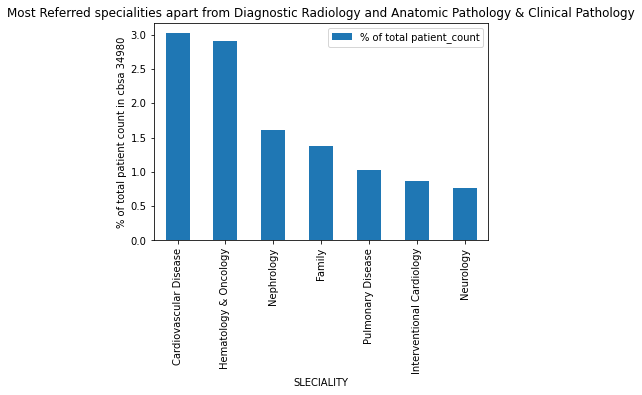

In [415]:
((((refto_from[(refto_from['ref_to_speciality'].isin(['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
 'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']))].groupby(['ref_to_speciality'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100)
  .sort_values(ascending = False).to_frame()
 .iloc[0:20]
 .rename(columns={'patient_count': '% of total patient_count'})
 .plot(kind="bar",
       title = 'Most Referred specialities apart from Diagnostic Radiology and Anatomic Pathology & Clinical Pathology',
       xlabel='SLECIALITY', 
       ylabel='% of total patient count in cbsa 34980')
)

In [429]:
# (
# (((refto_from['ref_to_speciality'].isin(['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
#  'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']))].groupby(['ref_to_group', 'ref_to_speciality', 'ref_to_facility'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).to_frame().iloc(50:100)
    
  

((((refto_from[(refto_from['ref_to_speciality'].isin(['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
 'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']))].groupby(['ref_to_speciality', 'ref_to_facility'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100)
  .sort_values(ascending = False).to_frame()
 .iloc[0:20]
  .rename(columns={'patient_count': '% of total patient_count'})
 
)

# ['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
#  'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']


# (((refto_from['ref_to_specilaity'].isin['Cardiovascular Disease', 'Hematology & Oncology', 'Nephrology', 'Family', 
#  'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']).groupby(['ref_to_facility'])['patient_count']
#    .sum())/(refto_from['patient_count'].sum()))*100)
#    .sort_values(ascending = False).to_frame()
#     .rename(columns={'patient_count': '% of total patient_count'})
#     .iloc[0:20]
#     )
    

% of total patient_count
ref_to_speciality         ref_to_facility                                                           
Hematology & Oncology     TENNESSEE ONCOLOGY PLLC                                           2.349978
Nephrology                NEPHROLOGY ASSOCIATES, PC                                         0.683477
Neurology                 REMOTE NEUROMONITORING PHYSICIANS ,PC                             0.220259
Cardiovascular Disease    WILLIAMSON PROFESSIONAL PRACTICE                                  0.100903
Neurology                 SKYLINE NEUROSCIENCE ASSOCIATES, LLC                              0.076339
                          CENTENNIAL NEUROSCIENCE, LLC                                      0.044646
Pulmonary Disease         TENNESSEE COMPREHENSIVE LUNG AND SLEEP CENTER,PC                  0.038129
Cardiovascular Disease    LEBANON HMA, LLC                                                  0.033574
Pulmonary Disease         CLARKSVILLE PULMONARY & CRITICAL CARE, PC                         0.026813
Cardiovascular Disease    TRISTAR CARDIOVASCULAR SURGERY LLC                                0.023317
Hematology & Oncology     TENNESSEE ONCOLOGY, PLLC                                          0.023201
Family                    THE LITTLE CLINIC OF TENNESSEE LLC                                0.020484
Pulmonary Disease         CENTER FOR PULMONARY & SLEEP MEDICINE, PLC                        0.019254
Family                    MINUTECLINIC DIAGNOSTIC OF TENNESSEE PC                           0.018621
Nephrology                MIDDLE TENNESSEE NEPHROLOGY                                       0.018557
                          JOHN K. ENDSLEY, MD, PC                                           0.012543
Interventional Cardiology CARDIOVASCULAR INSTITUTE PC                                       0.011740
Hematology & Oncology     CANCER CARE, PLC                                                  0.011087
Neurology                 SOUTHERN HILLS NEUROLOGY CONSULTANTS LLC                          0.008810
Nephrology                R. P. SABO, M.D., P.C.                                            0.008517

In [425]:
((((refto_from[(refto_from['ref_to_speciality'].isin(['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
 'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']))].groupby(['ref_to_facility'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100)
  .sort_values(ascending = False).to_frame()
 .iloc[0:10]
 .rename(columns={'patient_count': '% of total patient_count'})
)

,% of total patient_count
ref_to_facility,
TENNESSEE ONCOLOGY PLLC,2.349978
"NEPHROLOGY ASSOCIATES, PC",0.683477
"REMOTE NEUROMONITORING PHYSICIANS ,PC",0.220259
WILLIAMSON PROFESSIONAL PRACTICE,0.100903
"SKYLINE NEUROSCIENCE ASSOCIATES, LLC",0.076339
"CENTENNIAL NEUROSCIENCE, LLC",0.044646
"TENNESSEE COMPREHENSIVE LUNG AND SLEEP CENTER,PC",0.038129
"LEBANON HMA, LLC",0.033574
"CLARKSVILLE PULMONARY & CRITICAL CARE, PC",0.026813


In [443]:
((((refto_from[(refto_from['ref_to_speciality'].isin(['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
 'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']))].groupby(['ref_to_speciality', 'ref_from_facility'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100)
  .sort_values(ascending = False).to_frame()
 .iloc[0:40]
 .rename(columns={'patient_count': '% of total patient_count'})
)

% of total patient_count
ref_to_speciality         ref_from_facility                                               
Hematology & Oncology     TENNESSEE ONCOLOGY PLLC                                 0.332296
Cardiovascular Disease    VANDERBILT UNIVERSITY MEDICAL CENTER                    0.300075
                          SAINT THOMAS MEDICAL PARTNERS                           0.116683
Hematology & Oncology     VANDERBILT UNIVERSITY MEDICAL CENTER                    0.091462
Family                    VANDERBILT UNIVERSITY MEDICAL CENTER                    0.082691
Cardiovascular Disease    ADVANCED DIAGNOSTIC IMAGING, PC                         0.082656
                          CENTENNIAL HEART LLC                                    0.081570
Nephrology                VANDERBILT UNIVERSITY MEDICAL CENTER                    0.067669
Hematology & Oncology     ADVANCED DIAGNOSTIC IMAGING, PC                         0.065267
Cardiovascular Disease    RADIOLOGY ALLIANCE PC                                   0.064225
Hematology & Oncology     RADIOLOGY ALLIANCE PC                                   0.060783
Cardiovascular Disease    SAINT THOMAS WEST HOSPITAL                              0.052894
Hematology & Oncology     SAINT THOMAS MEDICAL PARTNERS                           0.051581
Neurology                 VANDERBILT UNIVERSITY MEDICAL CENTER                    0.049356
Pulmonary Disease         ADVANCED DIAGNOSTIC IMAGING, PC                         0.047762
Nephrology                NEPHROLOGY ASSOCIATES, PC                               0.047474
Hematology & Oncology     ASSOCIATED PATHOLOGISTS, LLC                            0.046651
Cardiovascular Disease    HCA HEALTH SERVICES OF TENNESSEE, INC.                  0.045685
Family                    ADVANCED DIAGNOSTIC IMAGING, PC                         0.045363
Hematology & Oncology     HCA HEALTH SERVICES OF TENNESSEE, INC.                  0.041665
Cardiovascular Disease    TENNESSEE ONCOLOGY PLLC                                 0.039484
Nephrology                ADVANCED DIAGNOSTIC IMAGING, PC                         0.038405
Family                    SAINT THOMAS MEDICAL PARTNERS                           0.037976
Interventional Cardiology CENTENNIAL HEART LLC                                    0.037865
Nephrology                ASSOCIATED PATHOLOGISTS, LLC                            0.037671
                          PATHGROUP LABS, LLC                                     0.037444
Hematology & Oncology     ASSOCIATED PATHOLOGISTS LLC                             0.035623
                          PATHGROUP LABS, LLC                                     0.035067
Pulmonary Disease         SAINT THOMAS MEDICAL PARTNERS                           0.034295
Cardiovascular Disease    WILLIAMSON COUNTY HOSPITAL DISTRICT                     0.034185
Pulmonary Disease         VANDERBILT UNIVERSITY MEDICAL CENTER                    0.034153
Nephrology                ASSOCIATED PATHOLOGISTS LLC                             0.033909
                          SAINT THOMAS MEDICAL PARTNERS                           0.033044
Hematology & Oncology     SAINT THOMAS WEST HOSPITAL                              0.032977
Interventional Cardiology HCA HEALTH SERVICES OF TENNESSEE, INC.                  0.032071
Nephrology                RADIOLOGY ALLIANCE PC                                   0.032048
Pulmonary Disease         RADIOLOGY ALLIANCE PC                                   0.031849
Family                    RADIOLOGY ALLIANCE PC                                   0.028023
Hematology & Oncology     ANESTHESIA MEDICAL GROUP, PC                            0.027185
                          CENTENNIAL HEART LLC                                    0.026636

In [455]:
((((refto_from[(refto_from['ref_to_speciality'].isin(['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
 'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']))].groupby([ 'ref_from_facility','ref_to_speciality', 'ref_to_facility'  ])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100)
  .sort_values(ascending = False).to_frame()
 .iloc[0:40]
 .rename(columns={'patient_count': '% of total patient_count'})
)

# ((((refto_from[(refto_from['ref_to_speciality'].isin(['Cardiovascular Disease']))].groupby([ 'ref_from_facility','ref_to_speciality', 'ref_to_facility'  ])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100)
#   .sort_values(ascending = False).to_frame()
#  .iloc[0:40]
#  .rename(columns={'patient_count': '% of total patient_count'})
# )

,,,% of total patient_count
ref_from_facility,ref_to_speciality,ref_to_facility,
TENNESSEE ONCOLOGY PLLC,Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.233438
"ADVANCED DIAGNOSTIC IMAGING, PC",Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.047959
RADIOLOGY ALLIANCE PC,Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.044596
VANDERBILT UNIVERSITY MEDICAL CENTER,Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.043126
SAINT THOMAS MEDICAL PARTNERS,Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.038415
"ASSOCIATED PATHOLOGISTS, LLC",Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.035882
"HCA HEALTH SERVICES OF TENNESSEE, INC.",Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.031208
ASSOCIATED PATHOLOGISTS LLC,Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.028163
"PATHGROUP LABS, LLC",Hematology & Oncology,TENNESSEE ONCOLOGY PLLC,0.027247


In [346]:

(((refto_from[(refto_from['ref_from_commid']== 83) & (refto_from['ref_to_speciality'].isin(['Allergy', 
                                                                                            'Critical Care Medicine',
                                                                                            'Pain Medicine',
       'Dermatopathology', 
                                                                                            'MOHS-Micrographic Surgery',
       'Emergency Medical Services', 
                                                                                            'Pediatric Emergency Medicine',
       'Addiction Medicine', 'Adult Medicine', 'Geriatric Medicine',
       'Hospice and Palliative Medicine', 'Sports Medicine',
       'Advanced Heart Failure and Transplant Cardiology',
       'Allergy & Immunology', 'Cardiovascular Disease',
       'Clinical Cardiac Electrophysiology',
       'Endocrinology, Diabetes & Metabolism', 'Gastroenterology',
       'Hematology', 'Hematology & Oncology', 'Infectious Disease',
       'Interventional Cardiology', 'Medical Oncology', 'Nephrology',
       'Pulmonary Disease', 'Rheumatology', 'Sleep Medicine',
       'Female Pelvic Medicine and Reconstructive Surgery',
       'Gynecologic Oncology', 'Gynecology', 'Obstetrics',
       'Ophthalmic Plastic and Reconstructive Surgery',
       'Retina Specialist', 'Adult Reconstructive Orthopaedic Surgery',
       'Foot and Ankle Surgery', 'Hand Surgery',
       'Orthopaedic Surgery of the Spine', 'Orthopaedic Trauma',
       'Facial Plastic Surgery', 'Plastic Surgery within the Head & Neck',
       'Interventional Pain Medicine',
      
       'Cytopathology',
       'Brain Injury Medicine', 'Geriatric Psychiatry', 'Neurology',
       'Psychiatry', 'Neuroradiology',
       'Pediatric Radiology',
       'Therapeutic Radiology', 'Vascular & Interventional Radiology',
       'Plastic and Reconstructive Surgery', 'Surgery of the Hand',
       'Surgical Oncology', 'Trauma Surgery', 'Vascular Surgery',
       'Mental Health', 'Clinical', 'Clinical Child & Adolescent',
     
       'Oral and Maxillofacial Surgery', 'Gerontology', 'Pain Management',
       'Acute Care', 'Medical-Surgical',
       'Psychiatric/Mental Health, Adult', 'Adult Health', 'Family',
       'Primary Care', 'Psychiatric/Mental Health', "Women's Health",
        'Surgical', 'Foot & Ankle Surgery', 'Foot Surgery',
       'Primary Podiatric Medicine', 'Ambulatory Surgical',
       'End-Stage Renal Disease (ESRD) Treatment', 'Endoscopy',
       
       'Mental Health (Including Community Mental Health Center)',
      'Physical Therapy', 'Podiatric', 'Radiology',
       'Radiology, Mobile', 'Rehabilitation', 'Rural Health',
       'Sleep Disorder Diagnostic', 'Urgent Care', 'Critical Access',
       
       'Parenteral & Enteral Nutrition' 
       ]))].groupby(['ref_to_group', 'ref_to_speciality', 'ref_to_facility'])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100).to_frame()..iloc(50:100)
# .tail(20).plot(kind="bar", 
# title = '20 least Referred speciality from cluste 83 into VUMC', xlabel='Referred speciality in VUMC', ylabel='% of total patient number in cbsa 34980')

#198 rows

patient_count
ref_to_group                                   ref_to_speciality              ref_to_facility                                     
Allopathic & Osteopathic Physicians            Adult Medicine                 PHYSICIAN PARTNERS PC                       0.000264
                                               Cardiovascular Disease         GETHSEMANE CARDIOVASCULAR CLINIC PLLC       0.004652
                                                                              LEBANON HMA, LLC                            0.000357
                                                                              THE HEART AND VASCULAR CLINIC P.C.          0.004735
                                                                              TRISTAR CARDIOVASCULAR SURGERY LLC          0.021812
...                                                                                                                            ...
Podiatric Medicine & Surgery Service Providers Foot & Ankle Surgery           WILLIAMS FOOT CENTER, PLLC                  0.000123
                                               Foot Surgery                   BRIAN D. JACKSON, DPM, LLC                  0.000229
                                                                              OLIVER FOOT CLINIC, INC.                    0.000091
                                               Primary Podiatric Medicine     LAWRENCE E. BURNS, DPM, INC.                0.000079
Suppliers                                      Parenteral & Enteral Nutrition ACCURATE HEALTHCARE, INC.                   0.001850

[198 rows x 1 columns]

In [432]:
refto_from[(refto_from['ref_from_facility'].isin(["VANDERBILT CHILDREN'S", 'VANDERBILT CHILDRENS HOSPITAL',
       'VANDERBILT MEDICAL CENTER', 'VANDERBILT UNIVERSITY',
       'VANDERBILT UNIVERSITY MEDICAL CENTER', 'CONCENTRA VANDERBILT LLC',
       "MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL",
       'VANDERBILT PSYCHIATRIC HOSPITAL, LLC',
       'VANDERBILT HEART AND VASCULAR INSTITUTE',
       'VANDERBILT ORTHOPAEDIC INSTITUTE',
       'DOUGLAS L. VANDERBILT, M.D. ,P.C.',
       'VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC',
       'VANDERBILT HOSPITAL', 'VANDERBILT IMAGING SERVICES, LLC',
       "MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDERBILT",
       'VANDERBILT UNIVERSITY HOSPITAL',
       'VANDERBILT ORTHOPAEDICS AND REHABILITATION COOL SPRINGS',
       "VANDERBILT CHILDREN'S HOSPITAL PHARMACY",
       'VANDERBILT PSYCHIATRIC HOSPITAL',
       'VANDERBILT ST. THOMAS IMAGING, GP',
       'VANDERBILT HEALTH PHARMACY GROUP LLC',
       'VANDERBILT HOME CARE SERVICES, LLC',
       'VANDERBILT UNIVERSITY MEDICAL SCHOOL',
       'VANDERBILT UNIV. MEDICAL CENTER',
       'VANDERBILT ASTHMA SINUS ALLERGY PROGRAM',
       'VANDERBILT COMMUNITY MENTAL HEALTH CENTER',
       'VANDERBILT COMMUNITY AND HOME SERVICES',
       'VANDERBILT BEDFORD HOSPITAL, LLC',
       'VANDERBILT COFFEE HOSPITAL, LLC',
       'VANDERBILT INTEGRATED PROVIDERS, LLC',
       'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
       'VANDERBILT-INGRAM CANCER CENTER AT TENNOVA HEALTHCARE-CLARKSVILLE',
       'VANDERBILT MAURY RADIATION ONCOLOGY, LLC']))].groupby(['ref_to_commid'])['patient_count'].sum().sort_values(ascending =False).to_frame()

,patient_count
ref_to_commid,
11117,983552
9,246819
83,80084
328,79338
363,53976
7,21263
31,16341
2528,15822
11137,12882


In [451]:
comm = ((refto_from.groupby(['ref_to_commid', 'ref_from_commid'])['patient_count'].sum()/(refto_from['patient_count'].sum()))*100).sort_values(ascending=False).to_frame().rename(columns={'patient_count':'per_patient_count'})
comm.to_csv('data/comm.csv')

comm.head(20)
# refto_from.columns

,,per_patient_count
ref_to_commid,ref_from_commid,
83,83,17.185416
9,9,12.863655
7,7,12.364223
11117,11117,6.625891
328,328,5.404479
363,363,4.671399
2294,2294,3.611348
9,83,1.931835
83,9,1.918267


In [461]:
(
(((refto_from[(refto_from['ref_from_facility'].isin(["VANDERBILT CHILDREN'S", 'VANDERBILT CHILDRENS HOSPITAL',
       'VANDERBILT MEDICAL CENTER', 'VANDERBILT UNIVERSITY',
       'VANDERBILT UNIVERSITY MEDICAL CENTER', 'CONCENTRA VANDERBILT LLC',
       "MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL",
       'VANDERBILT PSYCHIATRIC HOSPITAL, LLC',
       'VANDERBILT HEART AND VASCULAR INSTITUTE',
       'VANDERBILT ORTHOPAEDIC INSTITUTE',
       'DOUGLAS L. VANDERBILT, M.D. ,P.C.',
       'VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC',
       'VANDERBILT HOSPITAL', 'VANDERBILT IMAGING SERVICES, LLC',
       "MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDERBILT",
       'VANDERBILT UNIVERSITY HOSPITAL',
       'VANDERBILT ORTHOPAEDICS AND REHABILITATION COOL SPRINGS',
       "VANDERBILT CHILDREN'S HOSPITAL PHARMACY",
       'VANDERBILT PSYCHIATRIC HOSPITAL',
       'VANDERBILT ST. THOMAS IMAGING, GP',
       'VANDERBILT HEALTH PHARMACY GROUP LLC',
       'VANDERBILT HOME CARE SERVICES, LLC',
       'VANDERBILT UNIVERSITY MEDICAL SCHOOL',
       'VANDERBILT UNIV. MEDICAL CENTER',
       'VANDERBILT ASTHMA SINUS ALLERGY PROGRAM',
       'VANDERBILT COMMUNITY MENTAL HEALTH CENTER',
       'VANDERBILT COMMUNITY AND HOME SERVICES',
       'VANDERBILT BEDFORD HOSPITAL, LLC',
       'VANDERBILT COFFEE HOSPITAL, LLC',
       'VANDERBILT INTEGRATED PROVIDERS, LLC',
       'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
       'VANDERBILT-INGRAM CANCER CENTER AT TENNOVA HEALTHCARE-CLARKSVILLE',
       'VANDERBILT MAURY RADIATION ONCOLOGY, LLC'])) & (refto_from["ref_to_speciality"].isin(['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
 'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']))]
    .groupby([ 'ref_to_speciality', 'ref_to_facility' ])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100)
  .to_frame()
 .iloc[0:40]
 .rename(columns={'patient_count': '% of total patient_count'})
)

# ((((refto_from[(refto_from['ref_to_speciality'].isin(['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
#  'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']))].groupby([ 'ref_from_facility','ref_to_speciality', 'ref_to_facility'  ])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100)
#   .sort_values(ascending = False).to_frame()
#  .iloc[0:40]
#  .rename(columns={'patient_count': '% of total patient_count'})
# )

# refto_from[(refto_from['ref_from_facility'].isin(["VANDERBILT CHILDREN'S", 'VANDERBILT CHILDRENS HOSPITAL',
#        'VANDERBILT MEDICAL CENTER', 'VANDERBILT UNIVERSITY',
#        'VANDERBILT UNIVERSITY MEDICAL CENTER', 'CONCENTRA VANDERBILT LLC',
#        "MONROE CARELL JR VANDERBILT CHILDREN'S HOSPITAL",
#        'VANDERBILT PSYCHIATRIC HOSPITAL, LLC',
#        'VANDERBILT HEART AND VASCULAR INSTITUTE',
#        'VANDERBILT ORTHOPAEDIC INSTITUTE',
#        'DOUGLAS L. VANDERBILT, M.D. ,P.C.',
#        'VANDERBILT ASTHMA SINUS AND ALLERGY PROGRAM, LLC',
#        'VANDERBILT HOSPITAL', 'VANDERBILT IMAGING SERVICES, LLC',
#        "MONROE CARELL JR. CHILDREN'S HOSPITAL AT VANDERBILT",
#        'VANDERBILT UNIVERSITY HOSPITAL',
#        'VANDERBILT ORTHOPAEDICS AND REHABILITATION COOL SPRINGS',
#        "VANDERBILT CHILDREN'S HOSPITAL PHARMACY",
#        'VANDERBILT PSYCHIATRIC HOSPITAL',
#        'VANDERBILT ST. THOMAS IMAGING, GP',
#        'VANDERBILT HEALTH PHARMACY GROUP LLC',
#        'VANDERBILT HOME CARE SERVICES, LLC',
#        'VANDERBILT UNIVERSITY MEDICAL SCHOOL',
#        'VANDERBILT UNIV. MEDICAL CENTER',
#        'VANDERBILT ASTHMA SINUS ALLERGY PROGRAM',
#        'VANDERBILT COMMUNITY MENTAL HEALTH CENTER',
#        'VANDERBILT COMMUNITY AND HOME SERVICES',
#        'VANDERBILT BEDFORD HOSPITAL, LLC',
#        'VANDERBILT COFFEE HOSPITAL, LLC',
#        'VANDERBILT INTEGRATED PROVIDERS, LLC',
#        'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
#        'VANDERBILT-INGRAM CANCER CENTER AT TENNOVA HEALTHCARE-CLARKSVILLE',
#        'VANDERBILT MAURY RADIATION ONCOLOGY, LLC']))].groupby(['ref_to_commid'])['patient_count'].sum().sort_values(ascending =False).to_frame()

% of total patient_count
ref_to_speciality      ref_to_facility                                                     
Cardiovascular Disease GETHSEMANE CARDIOVASCULAR CLINIC PLLC                       0.000140
                       LEBANON HMA, LLC                                            0.003752
                       THE HEART AND VASCULAR CLINIC P.C.                          0.000264
                       WILLIAMSON PROFESSIONAL PRACTICE                            0.008993
Family                 MONTCLAIR HEALTH AND WELLNESS LLC                           0.000096
                       RIVERVIEW PHYSICIAN PRACTICES, LLC                          0.000224
Hematology & Oncology  CANCER CARE, PLC                                            0.000394
                       NASHVILLE ONCOLOGY ASSOCIATES, PC                           0.000379
                       TENNESSEE ONCOLOGY PLLC                                     0.043446
                       TENNESSEE ONCOLOGY, PLLC                                    0.000461
Nephrology             DIALYSIS CLINIC INC                                         0.000155
                       JOHN K. ENDSLEY, MD, PC                                     0.000352
                       MIDDLE TENNESSEE NEPHROLOGY                                 0.000870
                       NEPHROLOGY ASSOCIATES, PC                                   0.012348
Neurology              NEUROLOGY CLINIC & ASSOCIATES, LLC                          0.000899
                       SOUTHERN HILLS NEUROLOGY CONSULTANTS LLC                    0.000315
                       W GARRISON STRICKLAND MD, PC                                0.000286
Pulmonary Disease      CENTER FOR PULMONARY & SLEEP MEDICINE, PLC                  0.000456
                       CLARKSVILLE PULMONARY & CRITICAL CARE, PC                   0.000673
                       DR. VIJAY PETHKAR MD PLLC                                   0.000631

In [465]:
(
(((refto_from[(refto_from['ref_from_facility'].isin(['DICKSON MEDICAL ASSOCIATES PC',
       'HCA HEALTH SERVICES OF TENNESSEE, INC.', 'RADIOLOGY ALLIANCE PC',
       'MEDICAL NECESSITIES & SERVICES LLC',
       'ALLEGRY & ENT ASSOCIATES OF MIDDLE TENNESSEE, P.C.',
       'MIDDLE TENNESSEE PULMONARY ASSOCIA', 'CENTENNIAL HEART LLC',
       'ASSOCIATES IN GASTRONETEROLOGY',
       'LONGS PARK EMERGENCY PHYSICIANS PLLC',
       'COLUMBIA MEDICAL GROUP - THE FRIST CLINIC INC',
       'ANESTHESIA MEDICAL GROUP, PC', 'MARATHON INPATIENT SERVICES PLLC',
       'THE SURGICAL CLINIC PLLC', 'NEPHROLOGY ASSOCIATES, PC',
       'NASHVILLE ANESTHESIA PLLC', 'PATHOLOGISTS LABORATORY INC',
       'TWO RIVERS EMERGENCY PHYSICIANS PLLC',
       'CENTENNIAL HOSPITALISTS, LLC',
       'TRISTAR JOINT REPLACEMENT INSTITUTE, LLC',
       'HENDERSONVILLE HOSPITAL CORPORATION',
       'NORTHRIDGE SURGERY CENTER, LP', 'SUMMIT SURGERY CENTER LP',
       'CENTENNIAL SURGERY CENTER LP',
       'CATARACT AND EYECARE CENTER,PROFESSIONAL LLC',
       'CENTRAL TENNESSEE HOSPITAL CORPORATION',
       'DICKSON MEDICAL ASSOCIATES, PC',
       'MATHIS DRIVE INPATIENT SERVICES PLLC',
       'LUTHER LAKE EMERGENCY PHYSICIANS, PLLC',
       'TRISTAR CARDIOVASCULAR SURGERY LLC',
       'HERMITAGE INPATIENT SERVICES PLLC',
       'HTI MEMORIAL HOSPITAL CORPORATION',
       'MIDDLE TENNESSEE HOSPITALIST, PLC',
       'DOVERSIDE EMERGENCY PHYSICIANS PLLC',
       'CENTENNIAL PSYCHIATRIC ASSOCIATES, LLC', 'COUNTY OF CHEATHAM',
       'GASTROENTEROLOGY & HEPATOLOGY ASSOCIATES PLLC',
       'GINA MENDOZA DPM PC', 'DIALYSIS ASSOCIATES, LLC',
       'TENNESSEE ONCOLOGY PLLC', 'MEDICAL GROUP SUMMIT INC',
       'OLD HICKORY LANE EMERGENCY PHYSICIANS PLLC',
       'ROBERTSON COUNTY GOVERNMENT FINANCE OFFICE',
       'DICKSON COUNTY OFFICE OF COUNTY MAYOR',
       'BRADLEYS HOME HEALTH CARE CENTER INC', 'DIALYSIS CLINIC INC.',
       'PERRIGIN MEDICAL PLLC', 'INTERVENTIONAL PAIN CENTER, PLLC',
       'NHC HEALTHCARE-SUMNER LLC', 'MEADOWLARK INPATIENT SERVICES PLLC',
       'SKYLINE MEDICAL GROUP LLC', 'AMEDISYS SP-TN, LLC',
       'TENNESSEE PHYSICIANS ALLIANCE PC',
       'NEWBERRY EMERGENCY PHYSICIANS PLLC', 'TRISTAR FAMILY CARE, LLC',
       'NEUROSURGICAL ASSOCIATES',
       'HOSPITAL BASED MEDICAL SERVICES OF TENNESSEE-I PC',
       'NASHVILLE ACUTE TRAUMA LLC', 'NASHVILLE FAMILY FOOT CARE, PLLC',
       'HERMITAGE PSYCHIATRIC GROUP', 'OXYGEN AND SLEEP ASSOCIATES, INC.',
       'OLYMPIC CONSULTING, LLC', 'SOUTHERN MEDICAL',
       'NHC HEALTHCARE-DICKSON LLC', 'FRED NORDQUIST, MD, PC',
       'ADVANCED MEDICAL SOLUTIONS, INC.',
       'TRISTAR GYNECOLOGY ONCOLOGY, LLC', 'DANIEL ADKISSON',
       'SKYLINE NEUROSCIENCE ASSOCIATES, LLC',
       'PORTLAND PRIMARY CARE LLC', 'DRS. REED & WILKERSON',
       'TRISTAR MEDICAL GROUP - LEGACY HEALTH, LLC',
       'TRISTAR BONE MARROW TRANSPLANT, LLC',
       'MEDICONE MEDICAL RESPONSE OF MIDDLE TENNESSEE INC',
       'NASHVILLE VASCULAR AND VEIN INSTITUTE, PLLC',
       'GASTROENTEROLOGY ASSOCIATES AT THE SUMMIT, P.C.',
       'SASH HEALTHCARE, PLC',
       'NASHVILLE PLASTIC SURGERY INSTITUTE, PLLC',
       'CENTENNIAL NEUROSCIENCE, LLC', 'NASHVILLE BONE AND JOINT PLLC',
       'RELIANCE MEDICAL ASSOCIATES PLLC',
       'CENTENNIAL SURGICAL ASSOCIATES LLC',
       'METROPOLITAN GOVERNMENT OF NASHVILLE AND DAVIDSON COUNTY',
       'ORAL SURGICAL INSTITUTE INC', 'AMERICAN HOMEPATIENT, INC.',
       'TRISTAR RADIATION ONCOLOGY, LLC', 'APRIA HEALTHCARE LLC',
       'SUMMIT PRIMARY CARE', 'SPIROCARE DME LLC', 'LINCARE INC.',
       'HENDERSONVILLE SURGEONS', 'CENTENNIAL SURGICAL CLINIC, LLC',
       'FIRST CALL AMBULANCE LLC', 'INTEGUMETRIX',
       'DICKSON ORTHOPAEDIC AND SPORTS MEDICINE PLLC',
       'FIRST CALL AMBULANCE SERVICE, LLC',
       'SUNCREST HEALTHCARE OF MIDDLE TN, LLC',
       'LEAVITT FAMILY MEDICINE, PLLC',
       'NORTHCREST PHYSICIAN SERVICES INC', 'NORTHCREST MEDICAL CENTER',
       'STERLING PRIMARY CARE ASSOCIATES LLC',
       'TENNESSEE COMPREHENSIVE LUNG AND SLEEP CENTER,PC',
       'COLUMBIA MEDICAL GROUP-SOUTHERN HILLS INC',
       'MEDICAL GROUP-STONECREST INC',
       'MID TENNESSEE NEUROLOGY ASSOCIATES,PLC',
       'MENDOZA FOOT & ANKLE CENTER PC',
       'DAVIS FOOT AND ANKLE CENTERS, INC',
       'N MIDDLE TN EMERGENCY PHYSICIANS PLLC',
       'MONADNOCK EMERGENCY PHYSICIANS PLLC',
       'MEDICINE BOW INPATIENT SERVICES PLLC',
       'PEAKVIEW EMERGENCY PHYSICIANS PLLC',
       'GERIATRIC CONSULTING GROUP PC', 'OURAY INPATIENT SERVICES PLLC',
       'PHYSICIAN SERVICES OF MIDDLE TENNESSEE, LLC',
       'MCKENDREE VILLAGE, INC.',
       'INNOVATIVE SENIOR CARE HOME HEALTH OF NASHVILLE LLC',
       'NASHVILLE MEDICAL INVESTORS LLC',
       'WEST WILSON FAMILY PRACTICE CENTER, P.C.',
       'ASHOK K. MEHTA, MD, PC', 'DVA RENAL HEALTHCARE INC',
       'CREATIVE HEALTHCARE, PLLC', 'NASHVILLE SENIOR CARE LLC',
       'PINEWOOD MEDICAL LLC', 'NHC-OP LP', 'DICKSON OPERATOR LLC',
       'HILLCREST HEALTHCARE, LLC',
       'CHRISTIAN CARE CENTER OF CHEATHAM COUNTY INC',
       'GENTIVA CERTIFIED HEALTHCARE CORP.',
       'MADISON BEHAVIORAL HEALTH, LLC', 'MADISON ADULT MEDICINE, INC.',
       'VANCO HEALTH CARE AND REHABILITATION LLC',
       'TCMC MADISON-PORTLAND, INC.', 'LEMMON EMERGENCY PHYSICIANS PLLC',
       'HIGHLAND PARK MEDICAL INVESTORS, LLC', 'MARY A. MCELANEY, M.D.',
       'SOUTHERN HILLS NEUROLOGY CONSULTANTS LLC',
       'TENNESSEE FOOT & ANKLE SPECIALISTS PC',
       'JOHAN VAN JAARSVELD MD PLLC',
       'INTERNAL MEDICINE ASSOCIATES OF SOUTHERN HILLS LLC',
       'HOMETOWN RESPIRATORY CONSULTANTS INC',
       'GETHSEMANE CARDIOVASCULAR CLINIC PLLC',
       'GASTROENTEROLOGY SPECIALISTS OF MIDDLE TENNESSEE LLC',
       'AMEDISYS TENNESSEE, LLC', 'ROBERT C. RIPLEY, M.D., P.C.',
       'MEDICAL GROUP - SOUTHERN HILLS OF BRENTWOOD LLC',
       'CARDIOVASCULAR INSTITUTE PC', 'MIDDLE TENNESSEE NEUROLOGY LLC',
       'SPRINGFIELD SURGERY,P.C.',
       'SURGICAL ALLIANCE OF MIDDLE TENNESSEE, PLC',
       'NHC HEALTHCARE HENDERSONVILLE LLC',
       'NHC HEALTHCARE-HENDERSONVILLE LLC',
       'LHC HOMECARE OF TENNESSEE, LLC', 'CARIS HEALTHCARE, LP',
       'DICKSON EAR, NOSE & THROAT PLC',
       'CLINICAL AND FORENSIC PSYCHOLOGY PROFESSIONAL LLC',
       'REGENTS MEDICAL CENTER PC', 'STEEL FAMILY MEDICINE',
       'ANGELA WILLIS FAMILY PRACTICE PLLC', 'ALIVE HOSPICE, INC',
       'HOME HEALTH CARE OF MIDDLE TENNESSEE, LLC',
       'EAR NOSE & THROAT SPECIALISTS OF NASHVILLE PLC',
       'POST-ACUTE PHYSICIANS OF TENNESSEE PLLC',
       'RAPHA FAMILY WELLNESS PLLC', 'WAL-MART STORES EAST LP',
       'SOUTH SIDE DRUG CO INC', 'HILLCREST HEALTHCARE LLC',
       'THE WATERS OF CHEATHAM LLC', 'EMPSON DRUG CO INC',
       'LAKESHORE ESTATES, INC.', 'LIFELINC ANESTHESIA II, PLLC',
       'STERLING PRIMARY CARE', 'COMMUNITY PHARMACY CARE, INC',
       'DICKSON OPTICAL PC', 'KROGER LIMITED PARTNERSHIP I',
       'TENNESSEE CVS PHARMACY, L.L.C.',
       'SELECT PHYSICAL THERAPY HOLDINGS INC',
       "CHARLOTTE'S HOMETOWN PHARMACY", 'CDK LLC',
       'DICKSON ORTHOTICS & PROSTHETICS', 'FAMILY HEALTH, LLC',
       'WALGREEN CO', 'NASHVILLE LUNG CENTER, INC',
       'DRS. TIDWELL, FAULKS, AND ALLEN - OPTOMETRY, PLLC',
       'LP NORTH NASHVILLE, LLC', 'NHC HEALTHCARE-SPRINGFIELD LLC',
       'CURAHEALTH NASHVILLE, LLC', 'XUHAN PC LLP',
       'CRESCENT MEDICAL GROUP PLLC', 'NEURO RESOURCE PC',
       'PRAMOD B. WASUDEV, M.D., PLLC',
       'THE HEART AND VASCULAR CLINIC P.C.',
       'ROBERTSON COUNTY PHYSICAL MEDICINE LLC', 'STEWART MENTAL HEALTH',
       'SPRINGFIELD NEUROLOGY', 'JOHN C WESTERKAMM MD PLLC',
       'LIFELINE HOME HEALTH CARE OF SPRINGFIELD, LLC',
       'THE WATERS OF SPRINGFIELD LLC', 'THE WATERS OF ROBERTSON LLC',
       'CHRISTIAN CARE CENTER OF SPRINGFIELD LLC',
       'WILLIAM J. BINKLEY, M.D. LLC', 'STEVEN G SCHOEMER PC',
       'ASERACARE HOSPICE - NEW HORIZONS, LLC',
       'PARKS PRACTITIONER AND CONSULTING SERVICES LLC',
       'ADORATION HOSPICE, LLC', 'VALLEY MEDICAL CENTER, PLLC',
       'CONTINUOUS CARE SVC LLC', 'PUBLIX TENNESSEE LLC', 'WALGREEN CO.',
       'RAMA MEDICAL GROUP', 'ORTHOPAEDIC SPECIALISTS PLLC',
       'ALIVE HOSPICE, INC.', 'LUNG CONSULTANTS PLLC',
       'THE SURGICAL CLINIC, PLLC',
       'BLUEGRASS INTERNAL MEDICINE ASSOCIATES, PC', 'VICTOR KHA DO PLLC',
       'TENNRX, LLC', 'RIVERGATE PSYCHIATRIC & BEHAVIORAL HEALTH',
       'SLEEP PROFESSIONALS, LLC', 'HENDERSONVILLE OBGYN LLC',
       'TOTAL RENAL CARE INC', 'AMSURG HERMITAGE ANESTHESIA, LLC',
       'HERMITAGE TN ENDOSCOPY ASC, LLC',
       'COLUMBIA MEDICAL GROUP-CENTENNIAL INC',
       'LABORATORY FOR KIDNEY PATHOLOGY INC', 'TOTAL RENAL CARE, INC',
       'STEVEN D GRAHAM MD, NEUROLOGY PC', 'CENTENNIAL WOMENS GROUP, LLC',
       'DONELSON OBSTETRICS & GYN', 'SOUTHERN WOMANS CARE',
       'COOL SPRINGS SURGICAL ASSOCIATES LLC', 'DAVID A WEST',
       'PREMIER ASC LLC', 'DAVID A GILPIN MD PLC',
       'GENESIS WOMENS CARE INC', 'MISTYE TAYLOR MD PLLC',
       'SOUTHERN PAIN INSTITUTE PLLC',
       'STATE OF TENNESSEE STATE F&A PAYROLL',
       'PANACEA PSYCHIATRIC CENTER PLC', 'AIR EVAC EMS INC',
       'TENNESSEE BREAST CARE CENTER PLC',
       'OMFS PHYSICIANS OF ATHENS, PLLC',
       'HEARING SERVICES OF NASHVILLE, LLC',
       'NHC HEALTHCARE SPRINGFIELD LLC', 'GGNSC SPRINGFIELD LLC',
       'DICKSON HEALTHCARE LLC',
       'FIVE STAR REHABILITATION AND WELLNESS SERVICES, LLC.',
       'HARMONY FAMILY HEALTH CARE, LLC', 'NP HOUSECALLS, PLLC',
       'ADAMSPLACE, LLC', 'TENNESSEE CVS PHARMACY LLC',
       'BECKWITH EMERGENCY PHYSICIAN PLLC'])) & (refto_from["ref_to_speciality"].isin(['Cardiovascular Disease','Hematology & Oncology', 'Nephrology', 'Family', 
 'Pulmonary Disease', 'Interventional Cardiology', 'Neurology']))]
    .groupby([ 'ref_to_speciality', 'ref_to_facility' ])['patient_count'].sum())/(refto_from['patient_count'].sum()))*100)
  .sort_values(ascending=False).to_frame()
 .iloc[0:40]
 .rename(columns={'patient_count': '% of total patient_count'})
)

% of total patient_count
ref_to_speciality         ref_to_facility                                                           
Hematology & Oncology     TENNESSEE ONCOLOGY PLLC                                           0.471399
Nephrology                NEPHROLOGY ASSOCIATES, PC                                         0.099504
Neurology                 SKYLINE NEUROSCIENCE ASSOCIATES, LLC                              0.025576
                          CENTENNIAL NEUROSCIENCE, LLC                                      0.016130
Pulmonary Disease         TENNESSEE COMPREHENSIVE LUNG AND SLEEP CENTER,PC                  0.012462
Cardiovascular Disease    TRISTAR CARDIOVASCULAR SURGERY LLC                                0.008377
Hematology & Oncology     TENNESSEE ONCOLOGY, PLLC                                          0.007901
Interventional Cardiology CARDIOVASCULAR INSTITUTE PC                                       0.004802
Neurology                 SOUTHERN HILLS NEUROLOGY CONSULTANTS LLC                          0.004629
Cardiovascular Disease    WILLIAMSON PROFESSIONAL PRACTICE                                  0.004521
Pulmonary Disease         JOHAN VAN JAARSVELD MD PLLC                                       0.003215
                          LUNG CONSULTANTS PLLC                                             0.003048
Cardiovascular Disease    THE HEART AND VASCULAR CLINIC P.C.                                0.003013
Neurology                 MIDDLE TENNESSEE NEUROLOGY LLC                                    0.002949
Pulmonary Disease         CLARKSVILLE PULMONARY & CRITICAL CARE, PC                         0.002831
Cardiovascular Disease    GETHSEMANE CARDIOVASCULAR CLINIC PLLC                             0.002750
Neurology                 NEURO RESOURCE PC                                                 0.002742
Pulmonary Disease         MARY A. MCELANEY, M.D.                                            0.002249
Hematology & Oncology     TRISTAR BONE MARROW TRANSPLANT, LLC                               0.002030
Neurology                 REMOTE NEUROMONITORING PHYSICIANS ,PC                             0.001956
Nephrology                MIDDLE TENNESSEE NEPHROLOGY                                       0.001927
Pulmonary Disease         CENTER FOR PULMONARY & SLEEP MEDICINE, PLC                        0.001781
Nephrology                JOHN K. ENDSLEY, MD, PC                                           0.001744
Pulmonary Disease         NASHVILLE LUNG CENTER, INC                                        0.001616
Neurology                 SPRINGFIELD NEUROLOGY                                             0.001264
Cardiovascular Disease    LEBANON HMA, LLC                                                  0.000781
Pulmonary Disease         VICTOR KHA DO PLLC                                                0.000729
Hematology & Oncology     CANCER CARE, PLC                                                  0.000685
                          NASHVILLE ONCOLOGY ASSOCIATES, PC                                 0.000532
Nephrology                R. P. SABO, M.D., P.C.                                            0.000508
Family                    PINEWOOD MEDICAL LLC                                              0.000456
Neurology                 NORTHWEST NEUROLOGICAL ASSOCIATES PLLC                            0.000372
                          W GARRISON STRICKLAND MD, PC                                      0.000362
Family                    PRIMARY HEALTHCARE GROUP INC                                      0.000291
Pulmonary Disease         DR. VIJAY PETHKAR MD PLLC                                         0.000286
Neurology                 NEUROLOGY CLINIC & ASSOCIATES, LLC                                0.000281
Family                    THE LITTLE CLINIC OF TENNESSEE LLC                                0.000128
                          LIVINGSTON FAMILY PRACTICE, PLLC                                  0.000084

In [486]:
# (
# (((refto_from.groupby(['ref_to_speciality', 'ref_to_facility'])['patient_count']
#    .sum())/(refto_from['patient_count'].sum()))*100)
#    .sort_values(ascending = False)
#  .to_frame()
#     .rename(columns={'patient_count': '% of total patient_count'})
#     .iloc[2:20]
    
    
# )

# (11117 = 80; 9:202 : 83:250)(refered_to from 11117:563, 9:810,83:729)(speciality 11117:121, 9:117, 83:103) (refered_from_npi:2561,2267, 2177)

refto_from[(refto_from['ref_from_commid']== 11117)]['ref_from_facility'].unique() 

array(['VANDERBILT UNIVERSITY MEDICAL CENTER', nan,
       'WILLIAMSON IMAGING, LLC',
       'VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTER CLINICS AND SERVICES,',
       'WILSON COUNTY EYE SURGERY CENTER, LLC',
       'AMBULATORY SURGERY CENTER OF COOL SPRINGS LLC',
       'OPTION CARE INFUSION SERVICES, LLC',
       'MICHELLE KIM NGUYEN, MD, PC', 'SUSAN UNDERWOOD PHYSICAL THERAPY',
       'WILLIAMS MEDICAL SUPPLY INC', 'SPRING HILL SURGERY CENTER, LLC',
       'BINA PATEL, M/.D., P.C.', 'ONE HUNDRED OAKS IMAGING,LLC',
       'STAR PHYSICAL THERAPY LP', 'REN DERMATOLOGY PLLC',
       'CURCIO DERMATOLOGY, PC', 'PUBLIX TENNESSEE LLC',
       'TREVECCA CENTER FOR REHABILITATION AND HEALING LLC',
       'BETHANY CENTER FOR REHABILITATION AND HEALING LLC',
       'RETAIL HEALTH CLINICS, LLC',
       'PATTERSON CHIROPRACTIC SERVICES C.P.C.',
       'UNITED SEATING AND MOBILITY LLC',
       'DIXON CENTER OF CHIROPRACTIC INC', 'KESTNERPHYSMED, LLC',
       'WALGREEN CO', 'KROGER LIMITED PAR

In [493]:
refto_from['ref_to_classification'].unique()

array(['Allergy & Immunology', 'Anesthesiology', 'Clinical Pharmacology',
       'Colon & Rectal Surgery', 'Dermatology', 'Emergency Medicine',
       'Family Medicine', 'General Practice', 'Hospitalist',
       'Independent Medical Examiner', 'Internal Medicine',
       'Medical Genetics', 'Neurological Surgery',
       'Neuromusculoskeletal Medicine, Sports Medicine',
       'Nuclear Medicine', 'Obstetrics & Gynecology', 'Ophthalmology',
       'Oral & Maxillofacial Surgery', 'Orthopaedic Surgery',
       'Otolaryngology', 'Pain Medicine', 'Pathology', 'Pediatrics',
       'Phlebology', 'Physical Medicine & Rehabilitation',
       'Plastic Surgery', 'Preventive Medicine', 'Psychiatry & Neurology',
       'Radiology', 'Surgery',
       'Thoracic Surgery (Cardiothoracic Vascular Surgery)',
       'Transplant Surgery', 'Urology', 'Clinical Neuropsychologist',
       'Counselor', 'Psychologist', 'Social Worker', 'Chiropractor',
       'Dentist', 'Dietitian, Registered',
       'Personal 